In [1]:
# Importing Libraries
import time
import math
import joblib
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from tabulate import tabulate
from xgboost import XGBRegressor

# Geocoding services
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderUnavailable

# Plotting framework
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Interactive maps
import folium
from folium import Circle
from folium import Marker
from folium import Choropleth
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

# Plotly express for interactive plots
import plotly.express as px
# Plotly graph objects for detailed control
import plotly.graph_objects as go

**Importing the Initial Dataset**

In [2]:
b = pd.read_csv('/content/Bangalore.csv')
c = pd.read_csv('/content/Chennai.csv')
d = pd.read_csv('/content/Delhi.csv')
h = pd.read_csv('/content/Hyderabad.csv')
k = pd.read_csv('/content/Kolkata.csv')
m  = pd.read_csv('/content/Mumbai.csv')

**Dealing with Missing Values**

In [3]:
# Replacing all Cells having value 9 with Nan since as specified by authors those entries were missing
b.replace(9, np.nan, inplace=True)
c.replace(9, np.nan, inplace=True)
d.replace(9, np.nan, inplace=True)
h.replace(9, np.nan, inplace=True)
k.replace(9, np.nan, inplace=True)
m.replace(9, np.nan, inplace=True)

In [4]:
#Dropping all rows with empty entry
df1 = b.dropna()
df2 = c.dropna()
df3 = d.dropna()
df4 = h.dropna()
df5 = k.dropna()
df6 = m.dropna()

In [5]:
# Checking for NULL Value Count in each Dataset
df1.isnull().sum().sum()
df2.isnull().sum().sum()
df3.isnull().sum().sum()
df4.isnull().sum().sum()
df5.isnull().sum().sum()
df6.isnull().sum().sum()


0

**Initial Dataset Information**

In [6]:
# Dimensions of all 6 city Dataset
print(f"Bangalore:{df1.shape}\n")
print(f"Chennai:{df2.shape}\n")
print(f"Delhi:{df3.shape}\n")
print(f"Hyderabad:{df4.shape}\n")
print(f"Kolkata:{df5.shape}\n")
print(f"Mumbai:{df6.shape}\n")

Bangalore:(1951, 40)

Chennai:(2233, 40)

Delhi:(2002, 40)

Hyderabad:(2434, 40)

Kolkata:(75, 40)

Mumbai:(1398, 40)



In [7]:
# Feature Description
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1951 entries, 0 to 1950
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1951 non-null   int64  
 1   Area                 1951 non-null   int64  
 2   Location             1951 non-null   object 
 3   No. of Bedrooms      1951 non-null   int64  
 4   Resale               1951 non-null   int64  
 5   MaintenanceStaff     1951 non-null   float64
 6   Gymnasium            1951 non-null   float64
 7   SwimmingPool         1951 non-null   float64
 8   LandscapedGardens    1951 non-null   float64
 9   JoggingTrack         1951 non-null   float64
 10  RainWaterHarvesting  1951 non-null   float64
 11  IndoorGames          1951 non-null   float64
 12  ShoppingMall         1951 non-null   float64
 13  Intercom             1951 non-null   float64
 14  SportsFacility       1951 non-null   float64
 15  ATM                  1951 non-null   float6

**Feature Engineering**

1. Assigning Each City a Unique Number

In [8]:
# Giving each City A Unique Code so that when we merge the dataset we can accurately predict
b['City Name'] = 1 #Bangalore
c['City Name'] = 2 #Chennai
d['City Name'] = 3 #Delhi
h['City Name'] = 4 #Hyderabad
k['City Name'] = 5 #Kolkata
m['City Name'] = 6 #Mumbai

2. Making the Price round off in Lakhs

In [9]:
df1.loc[:, 'Price'] = df1['Price'] / 100000
df2.loc[:, 'Price'] = df2['Price'] / 100000
df3.loc[:, 'Price'] = df3['Price'] / 100000
df4.loc[:, 'Price'] = df4['Price'] / 100000
df5.loc[:, 'Price'] = df5['Price'] / 100000
df6.loc[:, 'Price'] = df6['Price'] / 100000

3. Finding the Latitude and Longitute

In [10]:
# Function to find the Latitude and Longitute from the Area already present in all of the 6 Dataset
geolocator = Nominatim(user_agent="Ruch")

def feature_generation(df):
    lat = []
    long = []
    a = 0
    for i in df['Location']:
        try:
            location = geolocator.geocode(i, timeout=10)
            if location:
                lat.append(location.latitude)
                long.append(location.longitude)
            else:
                lat.append("NA")
                long.append("NA")
            print(a)
        except (GeocoderTimedOut, GeocoderUnavailable) as e:
            print(f"Error: {e}, at index {a}")
            lat.append("NA")
            long.append("NA")
        time.sleep(1)  # Add a delay to avoid hitting the rate limit
        a += 1

    df['Latitude'] = lat
    df['Longitude'] = long

In [11]:
feature_generation(df1)
df1.to_csv('Bangalore_updated.csv', index=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<ipython-input-10-cf41333cade6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = lat
<ipython-input-10-cf41333cade6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = long


In [12]:
feature_generation(df2)
df2.to_csv('Chennai_updated.csv', index=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<ipython-input-10-cf41333cade6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = lat
<ipython-input-10-cf41333cade6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = long


In [13]:
feature_generation(df3)
df3.to_csv('Delhi_updated.csv', index=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<ipython-input-10-cf41333cade6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = lat
<ipython-input-10-cf41333cade6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = long


In [14]:
feature_generation(df4)
df4.to_csv('Hyderabad_updated.csv', index=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<ipython-input-10-cf41333cade6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = lat
<ipython-input-10-cf41333cade6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = long


In [15]:
feature_generation(df5)
df5.to_csv('Kolkata_updated.csv', index=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


<ipython-input-10-cf41333cade6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = lat
<ipython-input-10-cf41333cade6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = long


In [16]:
feature_generation(df6)
df6.to_csv('Mumbai_updated.csv', index=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<ipython-input-10-cf41333cade6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = lat
<ipython-input-10-cf41333cade6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = long


In [11]:
# Loading the updated Dataset
bu = pd.read_csv('/content/Bangalore_updated.csv')
cu = pd.read_csv('/content/Chennai_updated.csv')
du = pd.read_csv('/content/Delhi_updated.csv')
hu = pd.read_csv('/content/Hyderabad_updated.csv')
ku = pd.read_csv('/content/Kolkata_updated.csv')
mu  = pd.read_csv('/content/Mumbai_updated.csv')

4. Further Dropping Rows in which Latitude/Longitude could not be Found

In [12]:
bu = bu.dropna()
cu = cu.dropna()
du = du.dropna()
hu = hu.dropna()
ku = ku.dropna()
mu = mu.dropna()

In [13]:
# Final Dimension of each City Dataset
print(f"Bangalore:{bu.shape}\n")
print(f"Chennai:{cu.shape}\n")
print(f"Delhi:{du.shape}\n")
print(f"Hyderabad:{hu.shape}\n")
print(f"Kolkata:{ku.shape}\n")
print(f"Mumbai:{mu.shape}\n")

Bangalore:(1642, 43)

Chennai:(2070, 43)

Delhi:(1959, 43)

Hyderabad:(2256, 43)

Kolkata:(70, 43)

Mumbai:(1288, 43)



**Merging All Dataset into A single Dataset**

In [14]:
city = pd.concat([bu, cu, du, hu, ku, mu], ignore_index=True)
print(f"Dataset Size:{city.shape}\n")

Dataset Size:(9285, 43)



**Shuffling the Entries of Dataset**  
It is done so that while training there is no misintrepretation or any dataset is given a preference over others

In [15]:
city = city.sample(frac=1, random_state=42)

**Merged Dataset Dimension**

In [16]:
city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9285 entries, 131 to 7270
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                9285 non-null   float64
 1   Area                 9285 non-null   int64  
 2   Location             9285 non-null   object 
 3   No. of Bedrooms      9285 non-null   float64
 4   Resale               9285 non-null   int64  
 5   MaintenanceStaff     9285 non-null   float64
 6   Gymnasium            9285 non-null   float64
 7   SwimmingPool         9285 non-null   float64
 8   LandscapedGardens    9285 non-null   float64
 9   JoggingTrack         9285 non-null   float64
 10  RainWaterHarvesting  9285 non-null   float64
 11  IndoorGames          9285 non-null   float64
 12  ShoppingMall         9285 non-null   float64
 13  Intercom             9285 non-null   float64
 14  SportsFacility       9285 non-null   float64
 15  ATM                  9285 non-null   floa

In [17]:
if 'City Name' in city.columns:
    # Count the number of unique city names
    unique_cities = city['City Name'].nunique()
    print(f'There are {unique_cities} unique city names in the dataset.')
else:
    print('The dataset does not contain a column named "city".')

There are 6 unique city names in the dataset.


In [18]:
df = city

**Feature Engineering**  
Here I merge similar features into a single feature so as to reduce dimenson.  
It doesn't affect much since all the merged features are binary in nature

In [19]:
# Combine features into categories
df['Amenities'] = df[['MaintenanceStaff', 'Cafeteria', 'ClubHouse', 'School', 'Hospital', 'ShoppingMall']].sum(axis=1)
df['Security'] = df[['24X7Security', 'Intercom', 'PowerBackup']].sum(axis=1)
df['Utilities'] = df[['RainWaterHarvesting', 'CarParking', 'StaffQuarter', 'Gasconnection', 'LiftAvailable']].sum(axis=1)
df['Recreation'] = df[['Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack', 'IndoorGames', 'SportsFacility', 'MultipurposeRoom', 'GolfCourse', 'Children\'splayarea']].sum(axis=1)
df['Furnishing'] = df[['WashingMachine', 'AC', 'Wifi', 'BED', 'VaastuCompliant', 'Microwave', 'TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']].sum(axis=1)

In [20]:
# Dropping the original binary features
df.drop(columns=[
    'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting',
    'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
    'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
    'Gasconnection', 'AC', 'Wifi', 'Children\'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave',
    'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'
], inplace=True)

**Final Dataset Description**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9285 entries, 131 to 7270
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            9285 non-null   float64
 1   Area             9285 non-null   int64  
 2   Location         9285 non-null   object 
 3   No. of Bedrooms  9285 non-null   float64
 4   Resale           9285 non-null   int64  
 5   City Name        9285 non-null   int64  
 6   Latitude         9285 non-null   float64
 7   Longitude        9285 non-null   float64
 8   Amenities        9285 non-null   float64
 9   Security         9285 non-null   float64
 10  Utilities        9285 non-null   float64
 11  Recreation       9285 non-null   float64
 12  Furnishing       9285 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage: 1015.5+ KB


In [22]:
df

,Price,Area,Location,No. of Bedrooms,Resale,City Name,Latitude,Longitude,Amenities,Security,Utilities,Recreation,Furnishing
131,690.00,1438,Begur,3.0,0,1,41.954192,3.208835,2.0,3.0,4.0,7.0,1.0
6020,36.50,1000,Nizampet,2.0,0,4,17.515397,78.381716,0.0,2.0,1.0,1.0,0.0
766,130.00,1800,J. P. Nagar,3.0,1,1,12.909694,77.586607,0.0,0.0,1.0,0.0,0.0
2943,115.00,600,Royapettah,1.0,0,2,13.055472,80.263971,2.0,3.0,3.0,8.0,0.0
1046,404.00,3517,Konanakunte,4.0,0,1,12.879286,77.569753,1.0,3.0,3.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,27.00,850,Hakimpet,2.0,1,4,17.549710,78.524133,0.0,0.0,0.0,0.0,0.0
5191,100.00,1000,Paschim Vihar,3.0,1,3,28.669578,77.095956,0.0,0.0,0.0,0.0,0.0
5390,175.00,1250,Vasant Kunj,2.0,1,3,28.529249,77.154134,0.0,0.0,0.0,0.0,0.0
860,75.56,1443,JP Nagar Phase 3,3.0,0,1,12.911841,77.590567,0.0,2.0,2.0,7.0,0.0


**Data Visualization**

<Axes: xlabel='Area', ylabel='Price'>

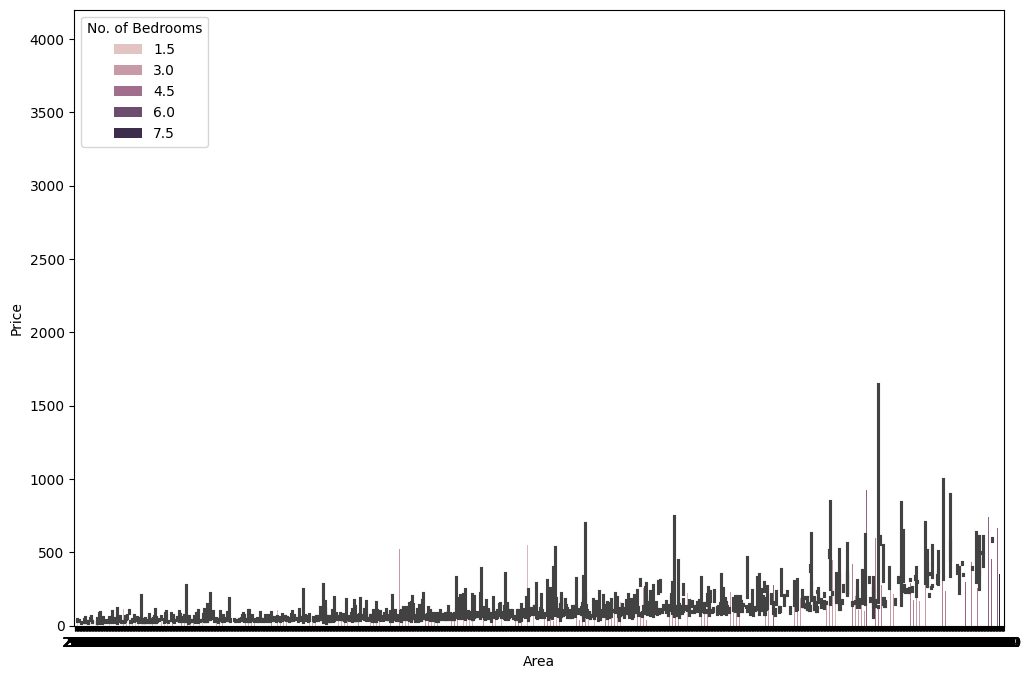

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Area', y = 'Price', data = df, hue = 'No. of Bedrooms')

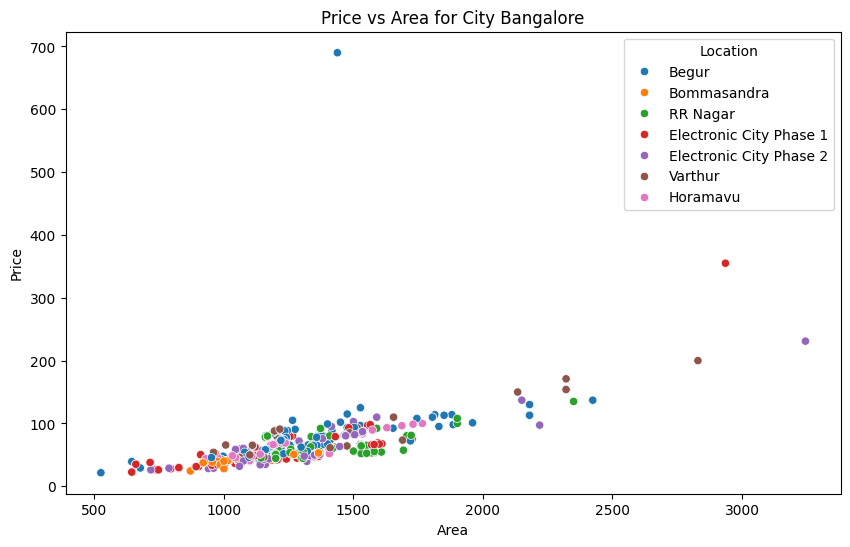

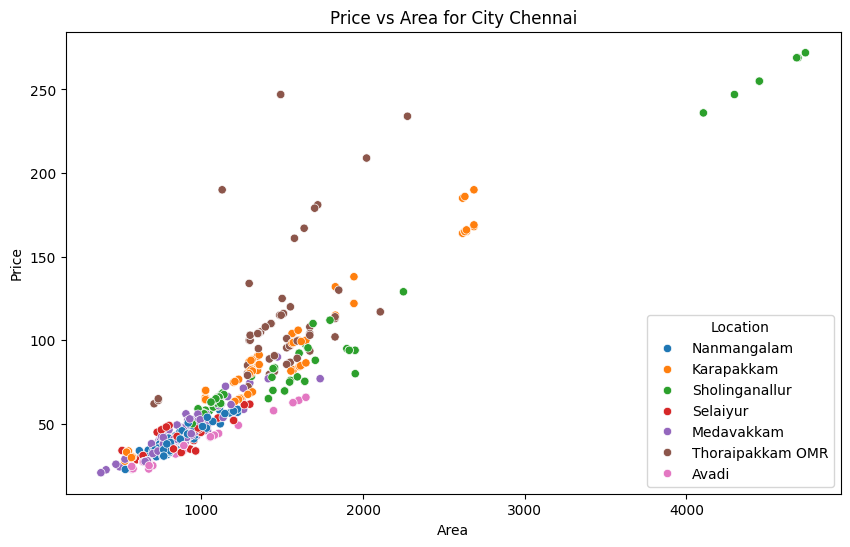

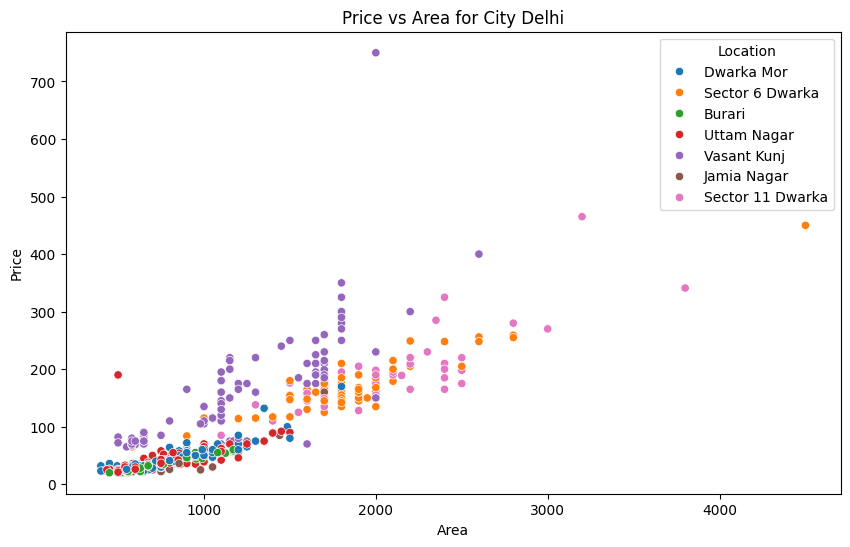

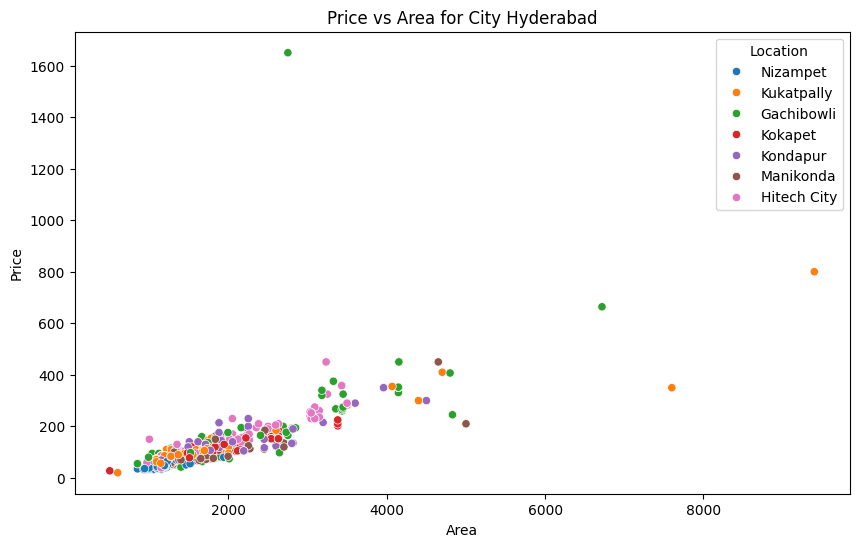

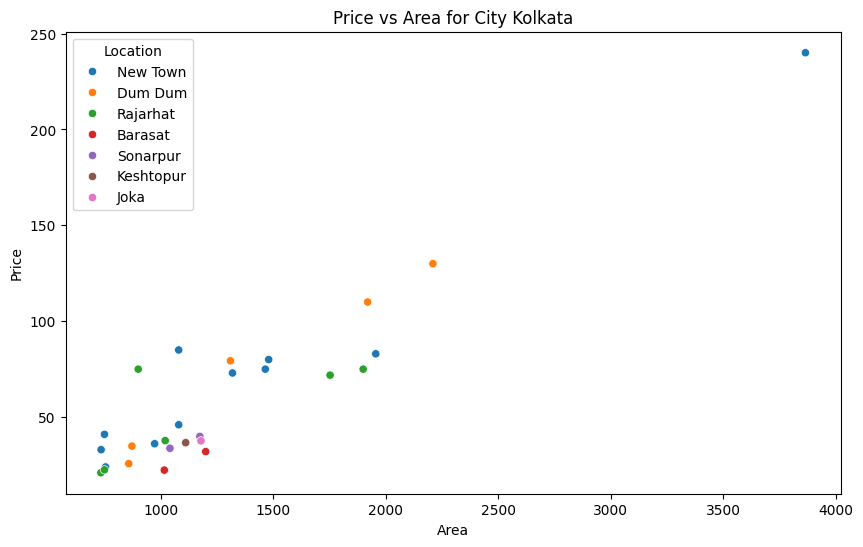

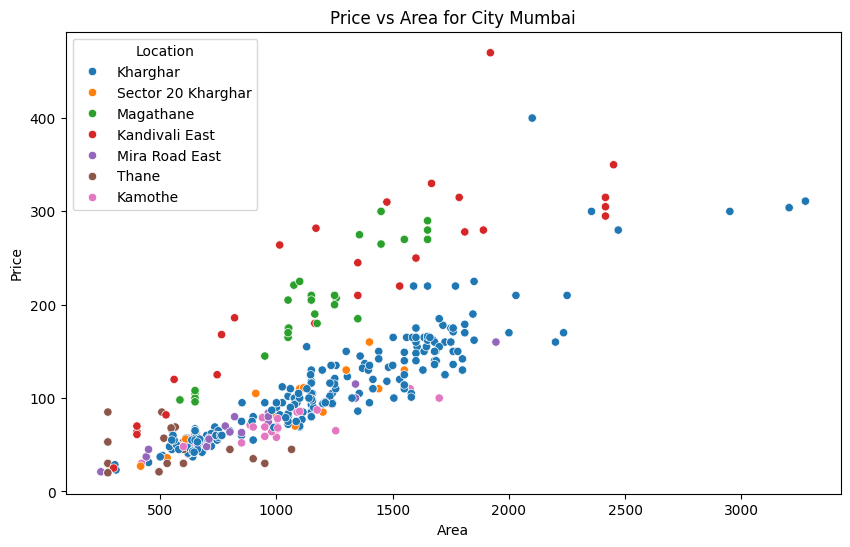

In [24]:
city_names = ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']

# Group the DataFrame by the 'City Name' column
city_groups = df.groupby('City Name')

# Iterate through each city group
for i, (city, data) in enumerate(city_groups):
    # Get the top 7 most prominent areas based on the count of properties
    top_areas = data['Location'].value_counts().nlargest(7).index

    # Filter the data to include only the top 7 areas
    filtered_data = data[data['Location'].isin(top_areas)]

    # Create a scatter plot for Price vs Area, color-coded by Location
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_data, x='Area', y='Price', hue='Location')
    plt.title(f'Price vs Area for City {city_names[i]}')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.legend(title='Location')
    plt.show()

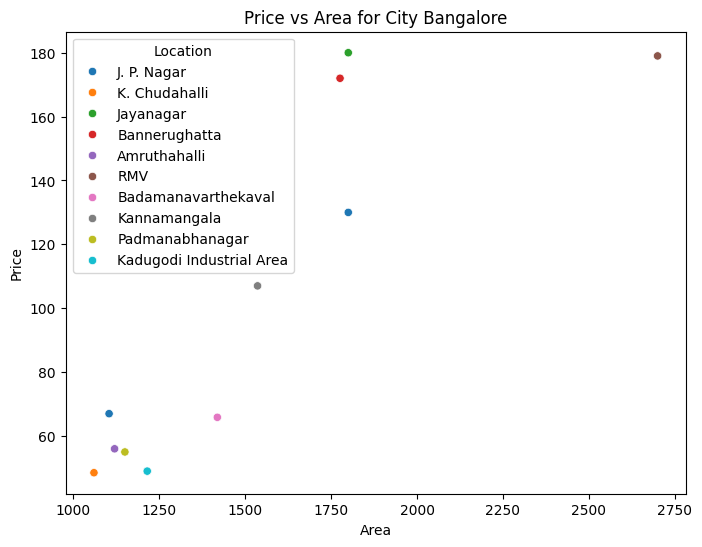

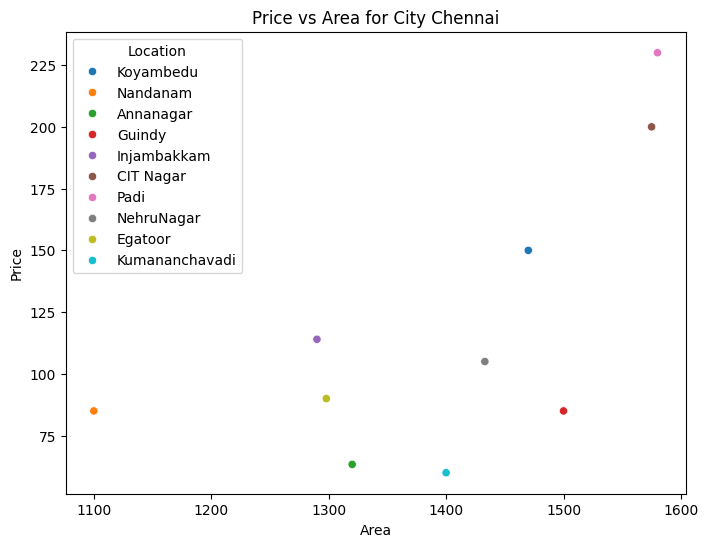

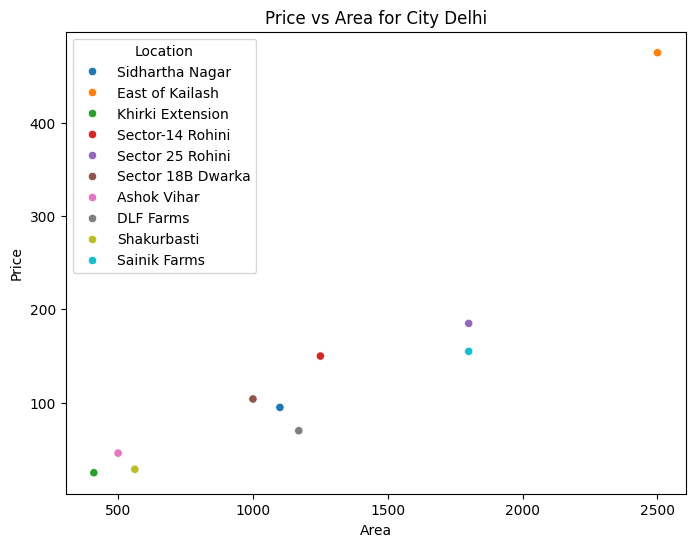

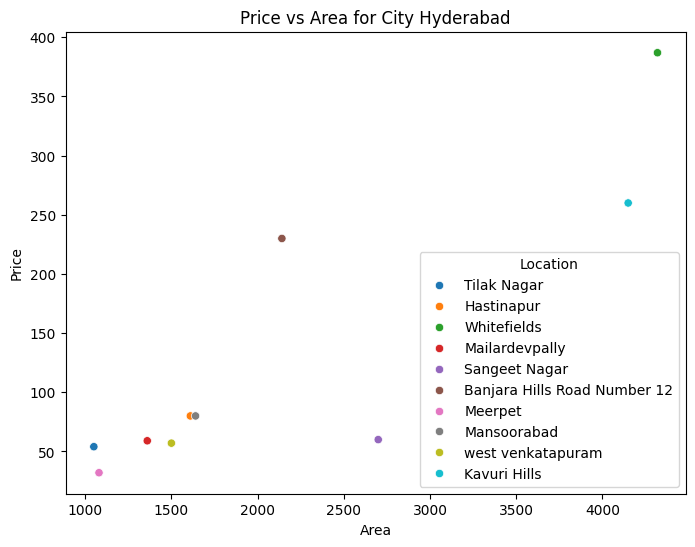

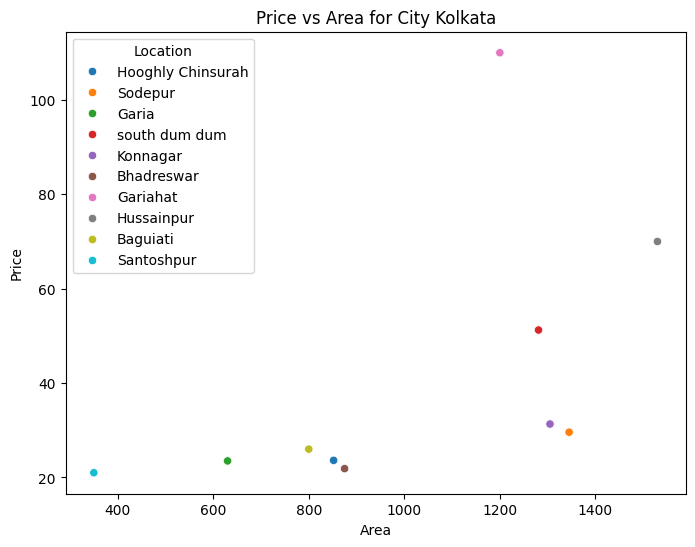

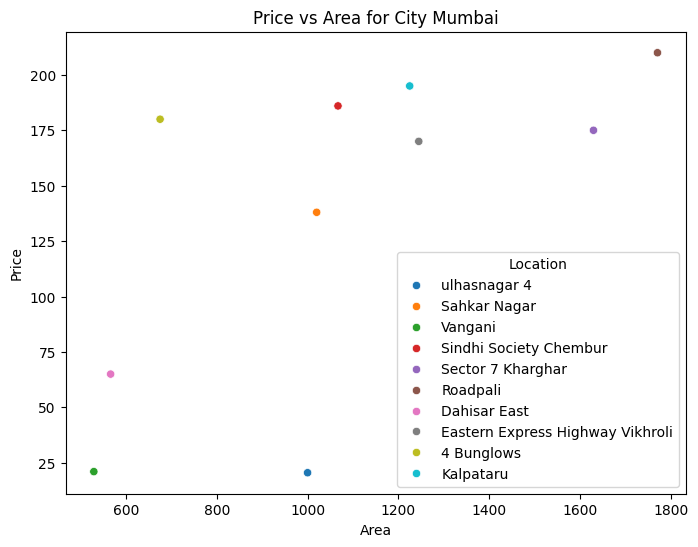

In [25]:
# Iterate through each city in the dataset
for i, (city, data) in enumerate(city_groups):
    # Get the top 10 least prominent areas based on the count of properties
    top_areas = data['Location'].value_counts().nsmallest(10).index

    # Filter the data to include only the top 10 areas
    filtered_data = data[data['Location'].isin(top_areas)]

    # Plot Price vs Area for the current city
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=filtered_data, x='Area', y='Price', hue='Location')
    plt.title(f'Price vs Area for City {city_names[i]}')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.legend(title='Location')
    plt.show()


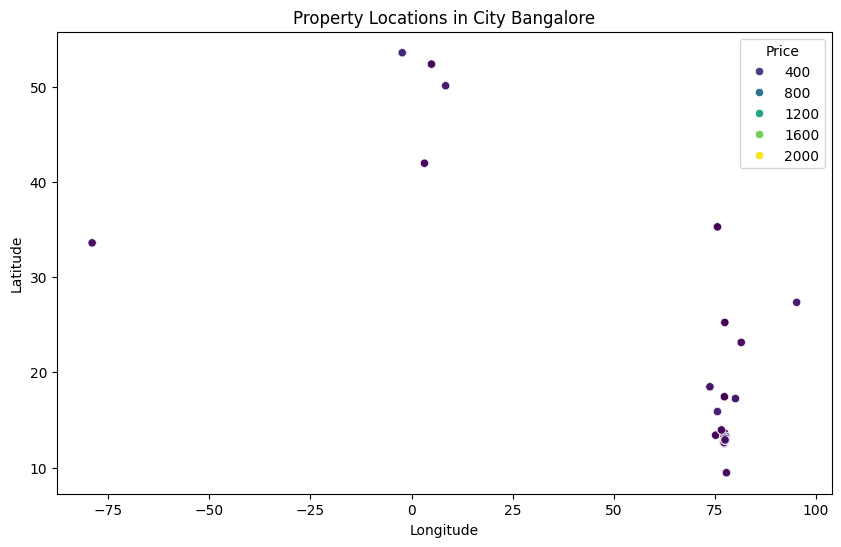

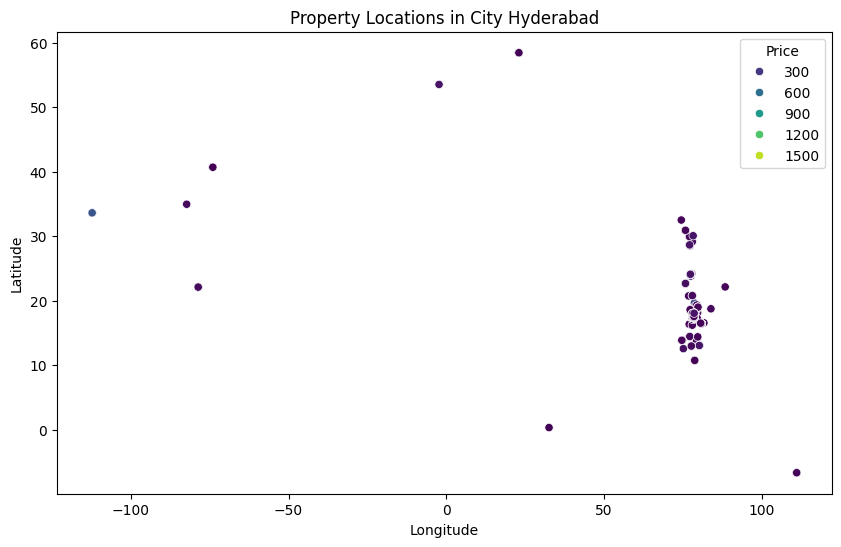

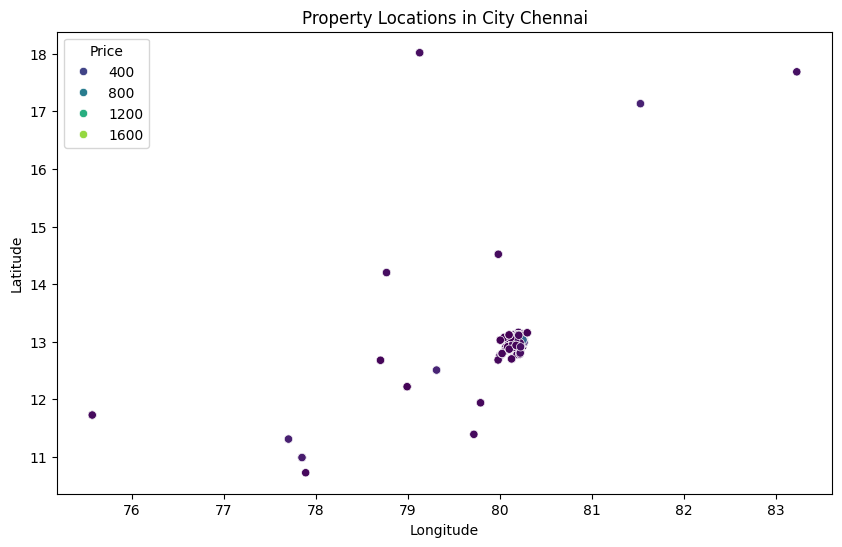

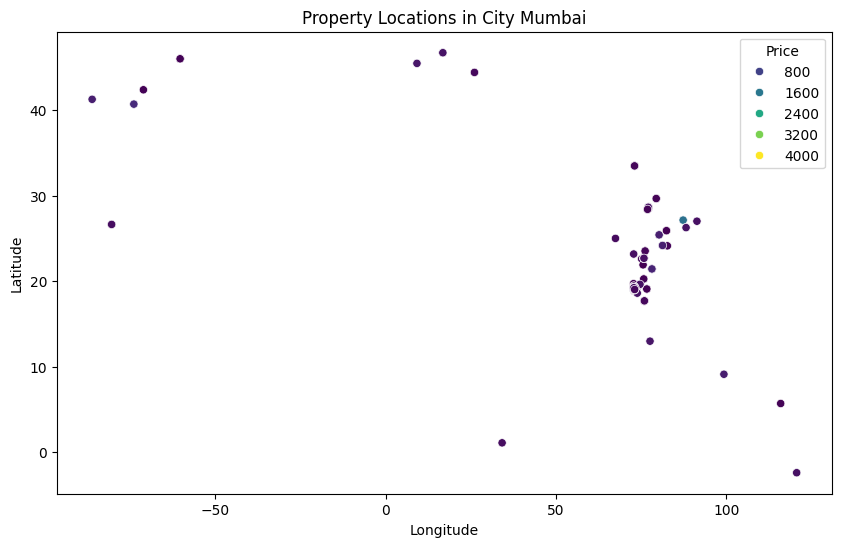

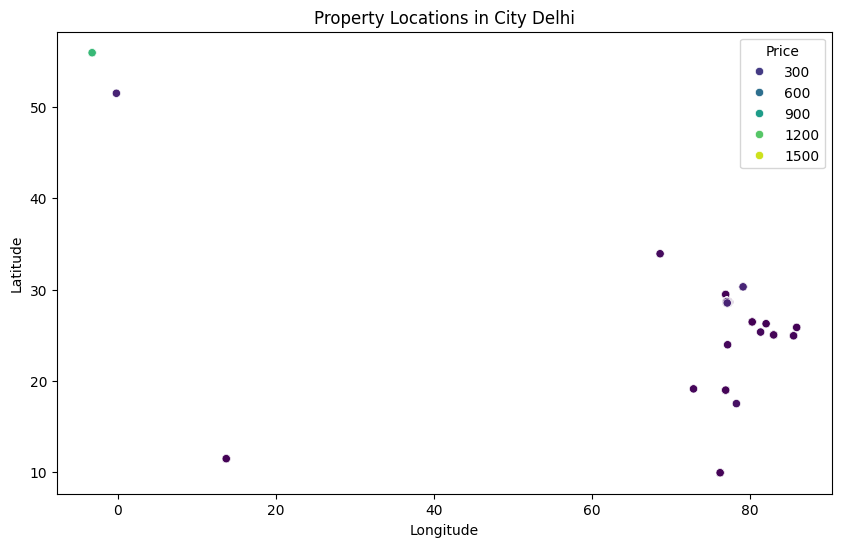

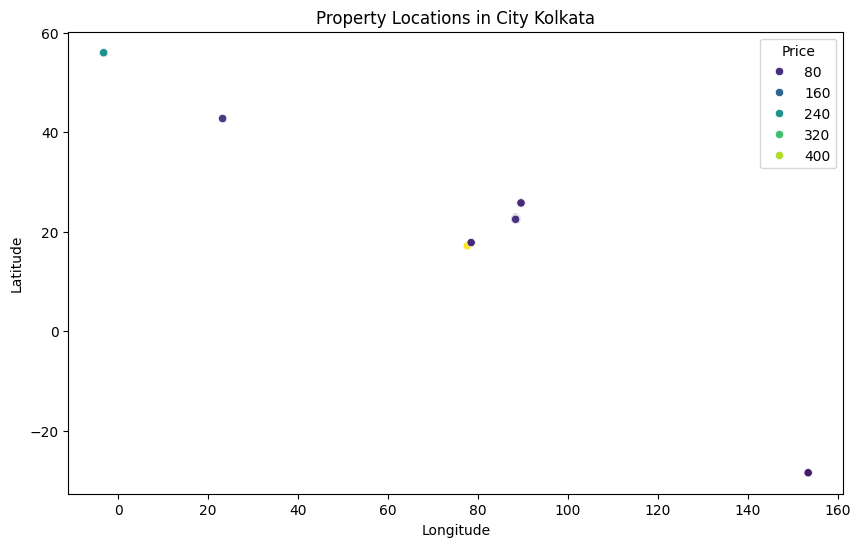

In [26]:
# Get the unique city names from the dataset
cities = df['City Name'].unique()

# List of city names (ensure alignment with unique city values)
city_names = ['', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']

# Iterate through each city in the unique city list
for city in cities:
    # Filter the data for the current city
    city_data = df[df['City Name'] == city]

    # Plot property locations for the current city
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=city_data, x='Longitude', y='Latitude', hue='Price', palette='viridis')
    plt.title(f'Property Locations in City {city_names[city]}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Price')
    plt.show()

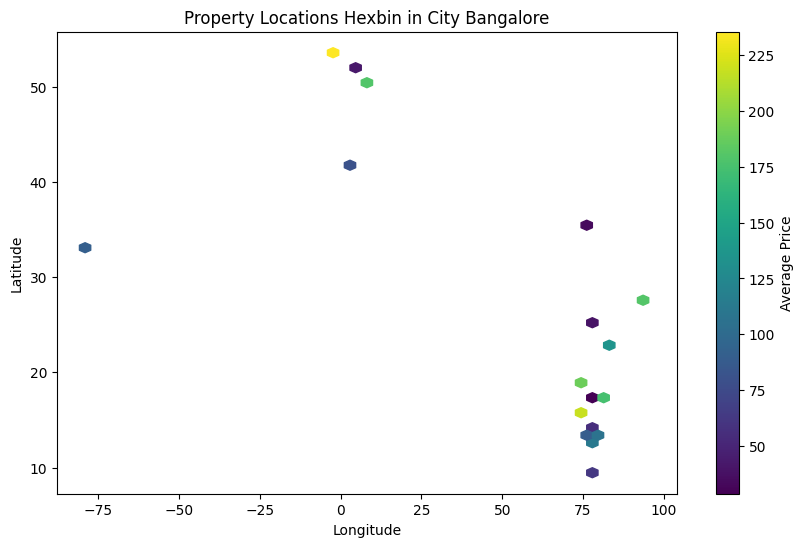

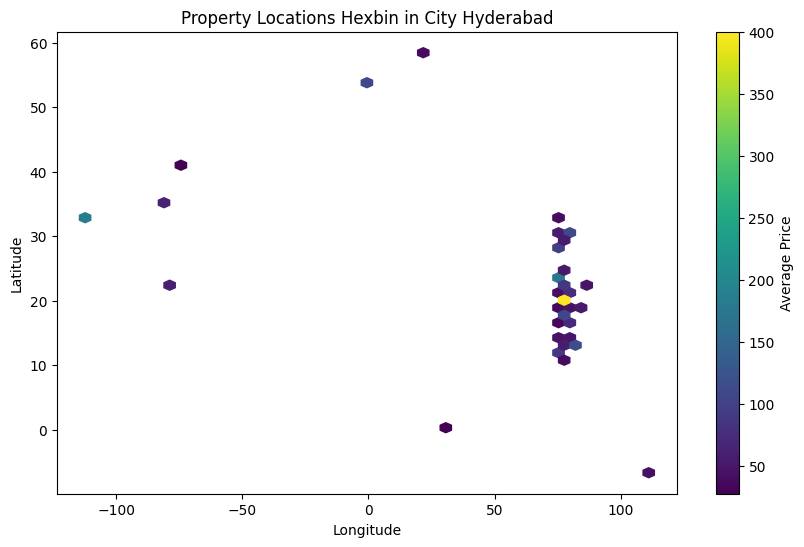

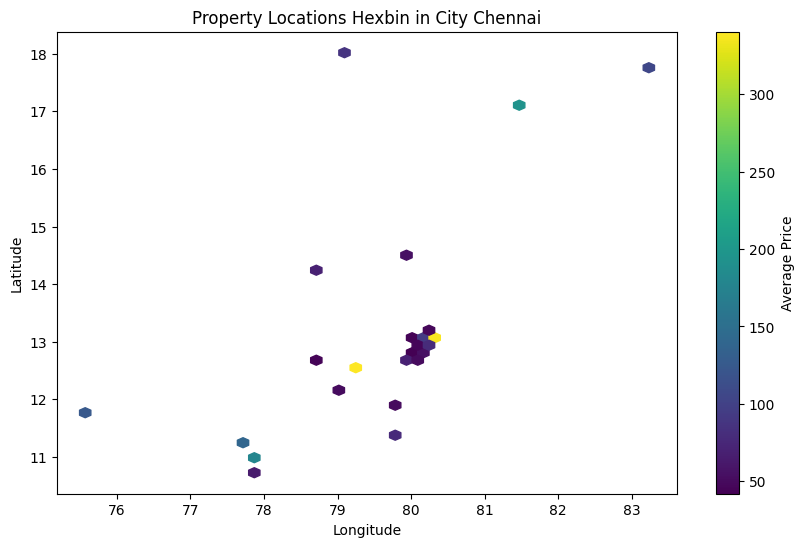

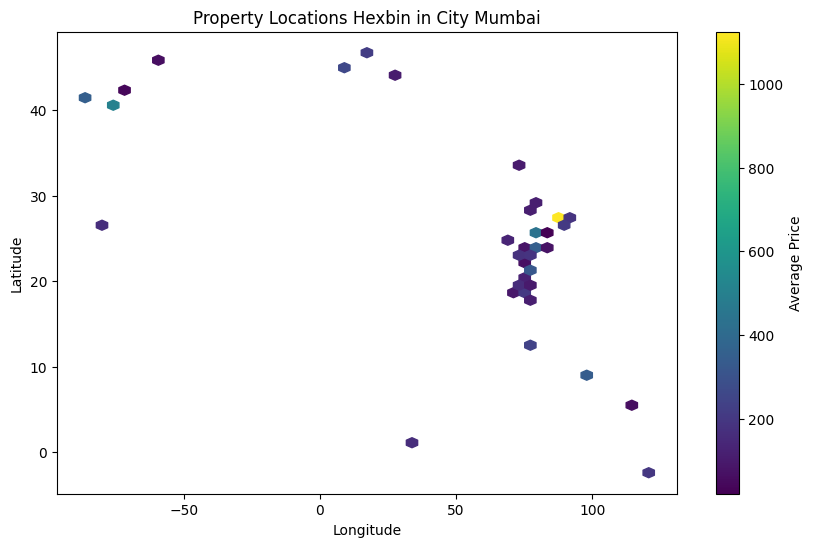

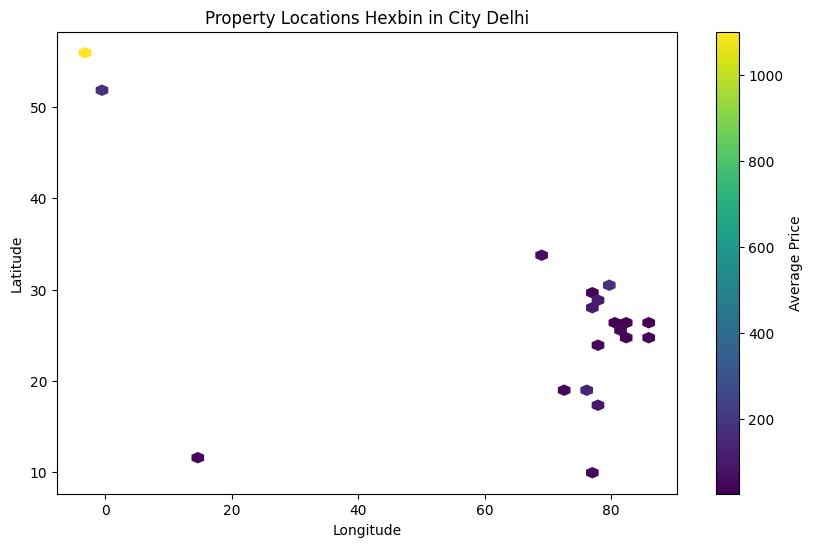

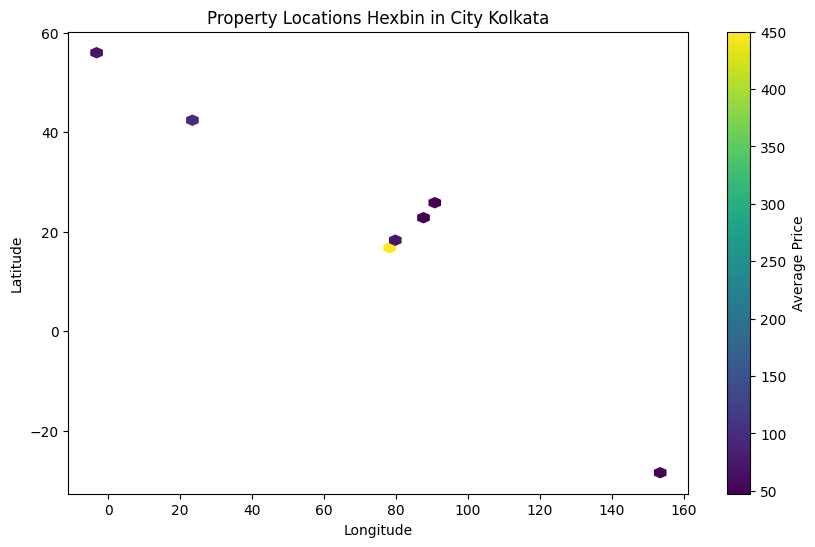

In [27]:
# Iterate through each city in the dataset
for city in cities:
    city_data = df[df['City Name'] == city]

    # Plot hexbin of property locations for the current city
    plt.figure(figsize=(10, 6))
    plt.hexbin(city_data['Longitude'], city_data['Latitude'], C=city_data['Price'], gridsize=50, cmap='viridis', reduce_C_function=np.mean)
    plt.colorbar(label='Average Price')
    plt.title(f'Property Locations Hexbin in City {city_names[city]}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

In [28]:
cities = df['City Name'].unique()
city_names = ['', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']

for city in cities:
    city_data = df[df['City Name'] == city]

    # Create a base map
    m = folium.Map(location=[city_data['Latitude'].mean(), city_data['Longitude'].mean()], zoom_start=12)

    # Create a heatmap
    heat_data = [[row['Latitude'], row['Longitude'], row['Price']] for index, row in city_data.iterrows()]
    HeatMap(heat_data).add_to(m)

    # Save the map to an HTML file
    m.save(f'Property_Locations_Heatmap_City_{city_names[city]}.html')
    print(f'Heatmap for {city_names[city]} saved as Property_Locations_Heatmap_City_{city_names[city]}.html')

Heatmap for Bangalore saved as Property_Locations_Heatmap_City_Bangalore.html
Heatmap for Hyderabad saved as Property_Locations_Heatmap_City_Hyderabad.html
Heatmap for Chennai saved as Property_Locations_Heatmap_City_Chennai.html
Heatmap for Mumbai saved as Property_Locations_Heatmap_City_Mumbai.html
Heatmap for Delhi saved as Property_Locations_Heatmap_City_Delhi.html
Heatmap for Kolkata saved as Property_Locations_Heatmap_City_Kolkata.html


In [29]:
# Create a map centered around the mean latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
map_ = folium.Map(location=map_center, zoom_start=12)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(map_)

# Add markers to the map
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Price: {row['Price']}, Area: {row['Area']}, Location: {row['Location']}, Bedrooms: {row['No. of Bedrooms']}"
    ).add_to(marker_cluster)

# Save map to an HTML file
map_.save('property_map.html')

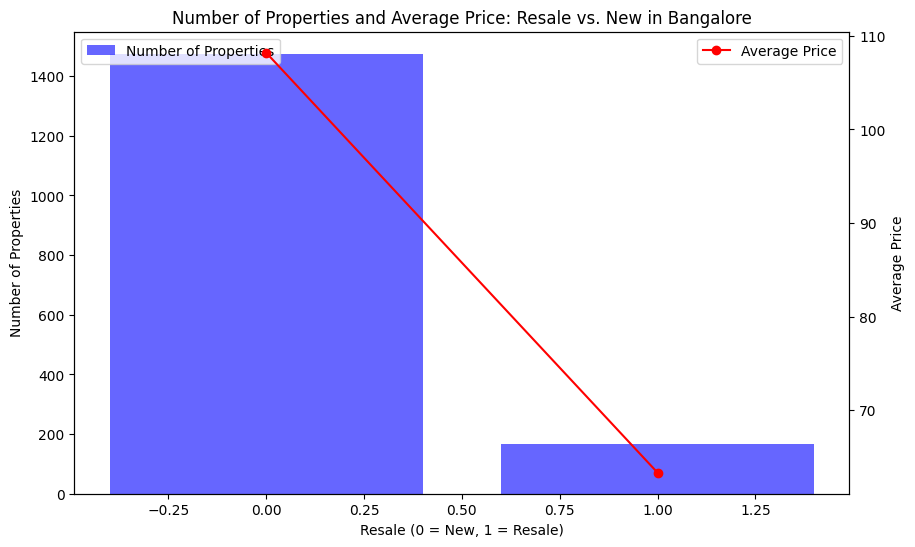

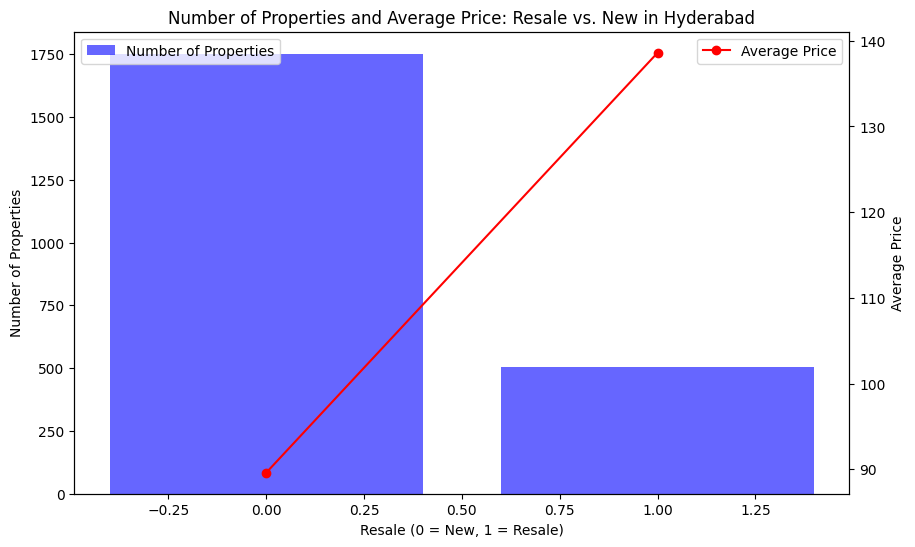

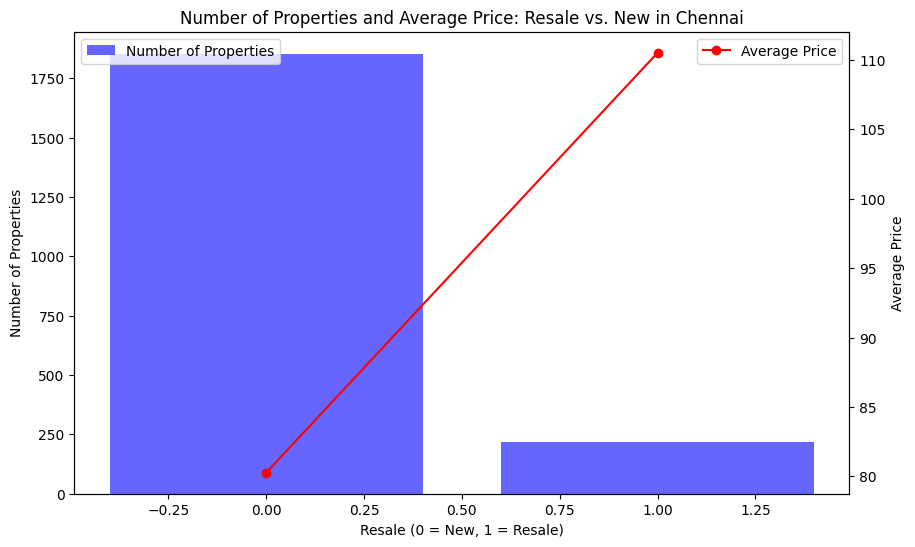

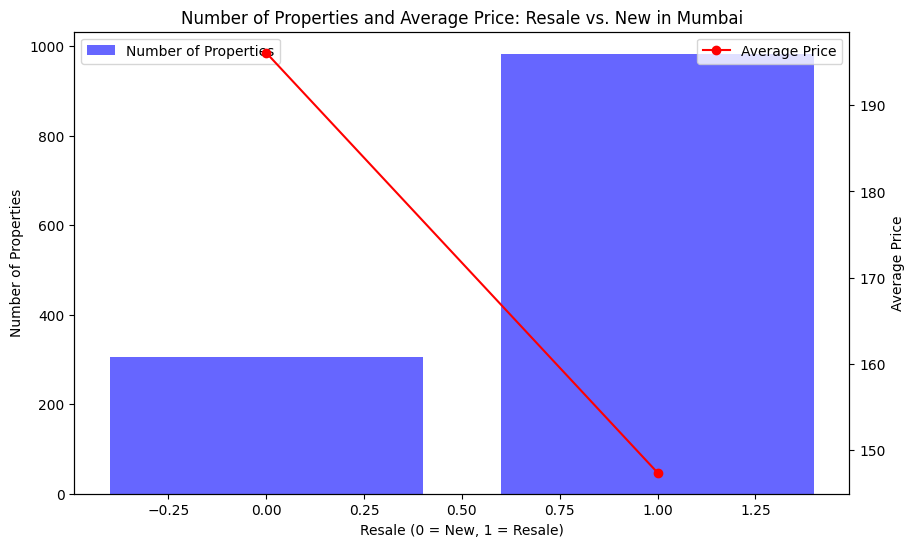

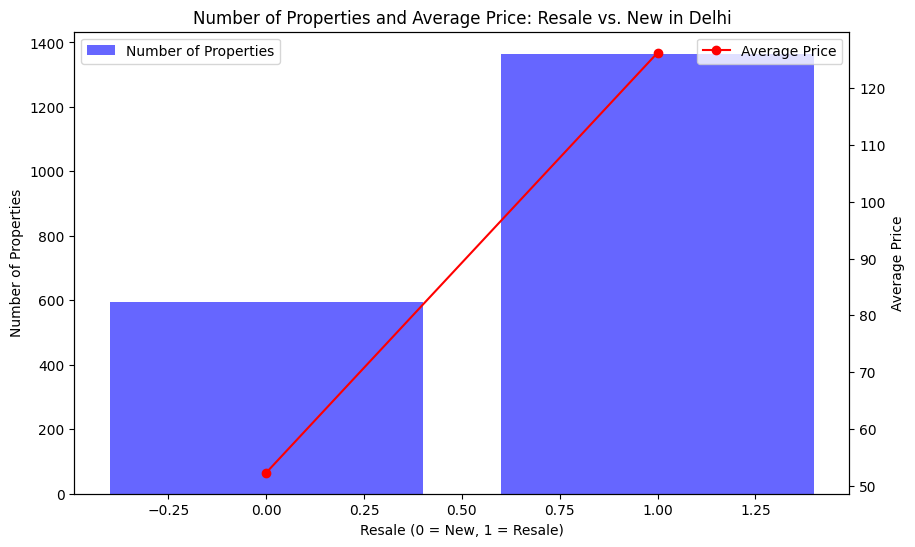

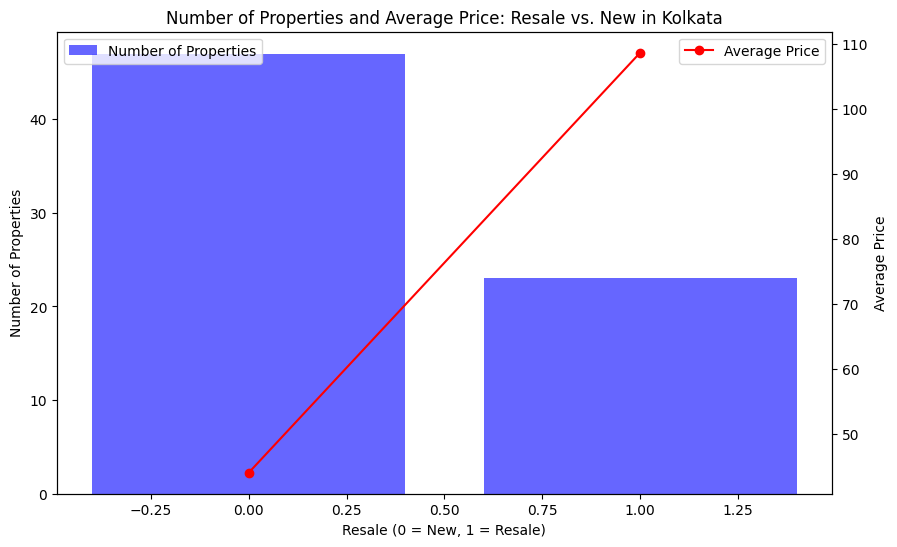

In [30]:
city_names = ['', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']

for city_id in df['City Name'].unique():
    city_df = df[df['City Name'] == city_id]

    # Group by Resale and count the number of properties
    resale_counts = city_df['Resale'].value_counts()

    # Group by Resale and compute the average price
    resale_prices = city_df.groupby('Resale')['Price'].mean()

    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the number of properties
    ax1.bar(resale_counts.index, resale_counts.values, color='b', alpha=0.6, label='Number of Properties')
    ax1.set_xlabel('Resale (0 = New, 1 = Resale)')
    ax1.set_ylabel('Number of Properties')
    ax1.legend(loc='upper left')

    # Create a second y-axis for the average price
    ax2 = ax1.twinx()
    ax2.plot(resale_prices.index, resale_prices.values, color='r', marker='o', linestyle='-', label='Average Price')
    ax2.set_ylabel('Average Price')
    ax2.legend(loc='upper right')

    plt.title(f'Number of Properties and Average Price: Resale vs. New in {city_names[city_id]}')
    plt.show()

**Prediction 1 - Location from City Name and Budget**

In [31]:
data = df

In [32]:
city_names = ['', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']

In [33]:
X = data[['City Name', 'Price', 'Area', 'No. of Bedrooms']]
y = data['Location']

# Convert the 'Location' column to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

data['Location_Encoded'] = y

# One-hot encode the 'City Name' column and scale other features
preprocessor = ColumnTransformer(
    transformers=[
        ('City Name', OneHotEncoder(), ['City Name']),
        ('num', StandardScaler(), ['Price', 'Area', 'No. of Bedrooms'])
    ]
)

# Define the model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Use a classifier instead of a regressor
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.4808831448572967


In [34]:
budget = int(input("Enter your budget: "))
city_name = int(input("Enter the city number (1-6): "))
area = int(input("Enter the area in square feet: "))
num_bedrooms = int(input("Enter the number of bedrooms: "))
# Predict the location
time.sleep(3)
X_new = pd.DataFrame({'City Name': [city_name], 'Price': [budget], 'Area': [area], 'No. of Bedrooms': [num_bedrooms]})
location_prediction = best_model.predict(X_new)

time.sleep(3)
# Decode the numerical prediction back to the original location labels
predicted_location = label_encoder.inverse_transform(location_prediction)
# predicted_city_row = data[predicted_location].iloc[0]

time.sleep(3)
print(f"Predicted location: {predicted_location[0]}")
# print(f"Predicted location Name: {predicted_city_row['Location']}")
print(f"Budget: {budget}")
print(f"City Name: {city_names[city_name]}")
print(f"Area: {area}")
print(f"No. of Bedrooms: {num_bedrooms}")

Enter your budget: 4032100
Enter the city number (1-6): 3
Enter the area in square feet: 2121
Enter the number of bedrooms: 3
Predicted location: Vasant Kunj
Budget: 4032100
City Name: Delhi
Area: 2121
No. of Bedrooms: 3


**Prediction 2 - Best Possible Features for Different Price Range**

In [35]:
merged = df

In [36]:
# Define feature names and target
feature_names = ['Area', 'No. of Bedrooms', 'Resale', 'Amenities', 'Security', 'Utilities', 'Recreation', 'Furnishing', 'Latitude', 'Longitude']
target_name = 'Price'

# Iterate over each city group
for city_id, group in merged.groupby('City Name'):
    X = group[feature_names]
    y = group[target_name]

    # Split the data
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

Metrics for City ID Bangalore:
Mean Absolute Error (MAE): 29.65
Mean Squared Error (MSE): 5936.25
R-squared (R²): 0.94
------------------------------


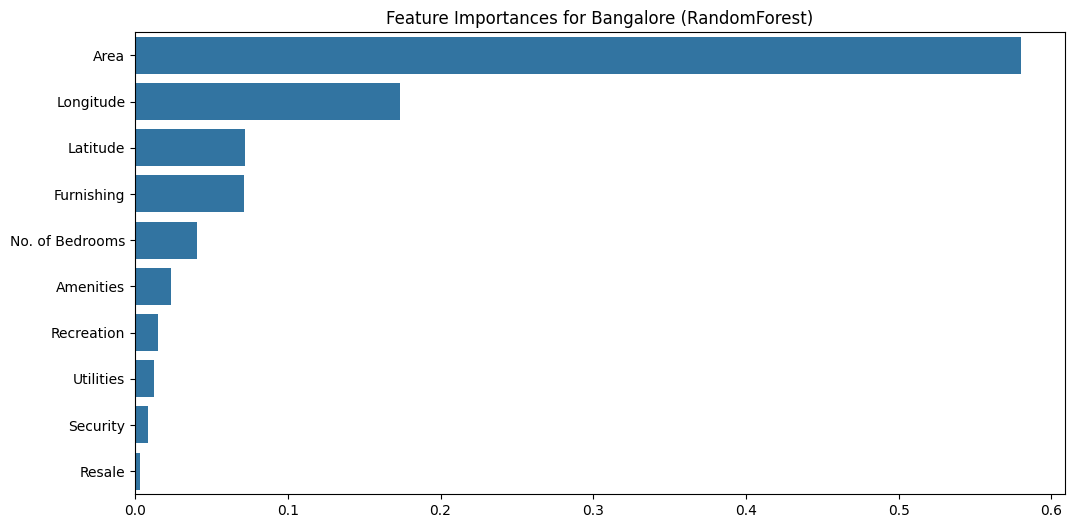

Metrics for City ID Chennai:
Mean Absolute Error (MAE): 31.86
Mean Squared Error (MSE): 9427.77
R-squared (R²): 0.90
------------------------------


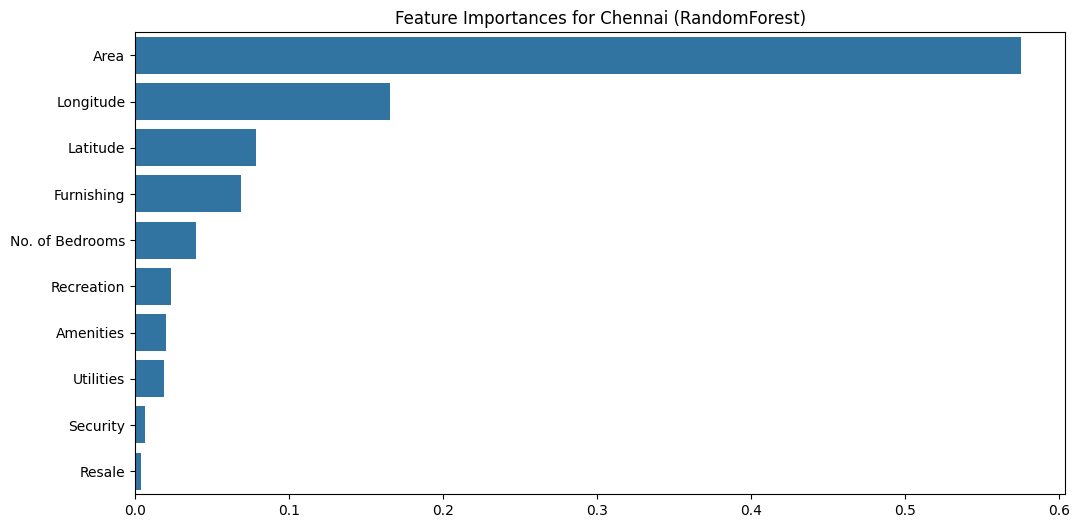

Metrics for City ID Delhi:
Mean Absolute Error (MAE): 29.94
Mean Squared Error (MSE): 7027.55
R-squared (R²): 0.93
------------------------------


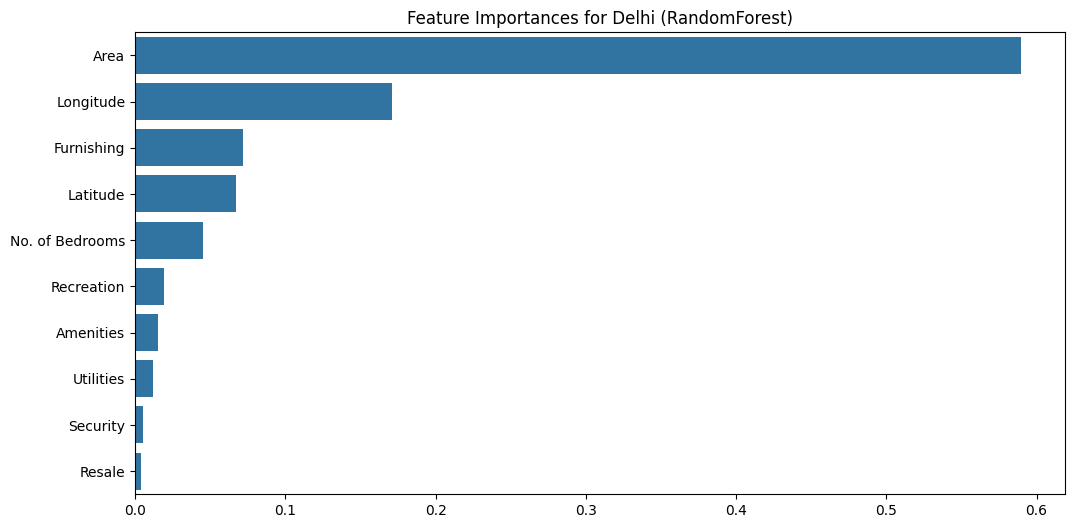

Metrics for City ID Hyderabad:
Mean Absolute Error (MAE): 32.10
Mean Squared Error (MSE): 9245.92
R-squared (R²): 0.90
------------------------------


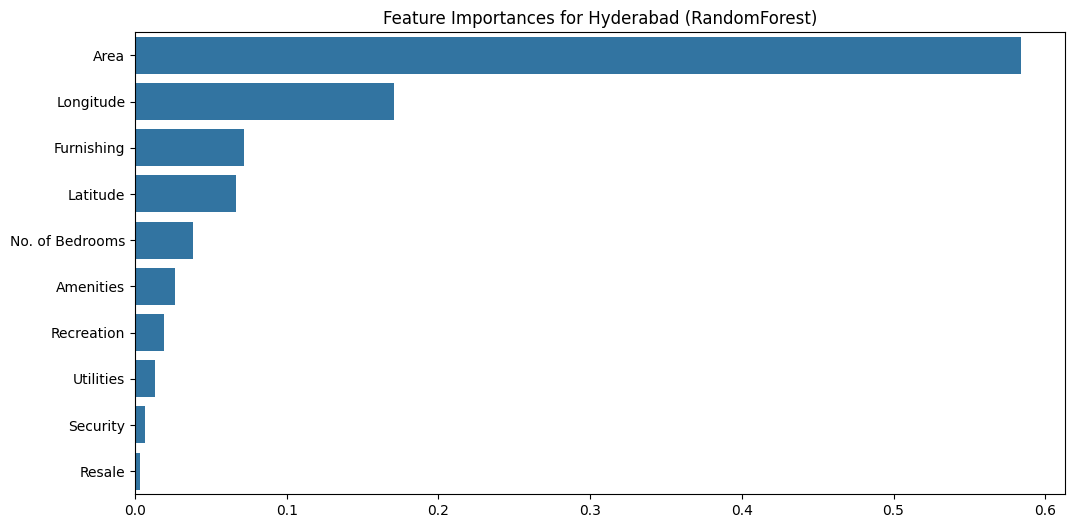

Metrics for City ID Kolkata:
Mean Absolute Error (MAE): 31.39
Mean Squared Error (MSE): 7694.35
R-squared (R²): 0.92
------------------------------


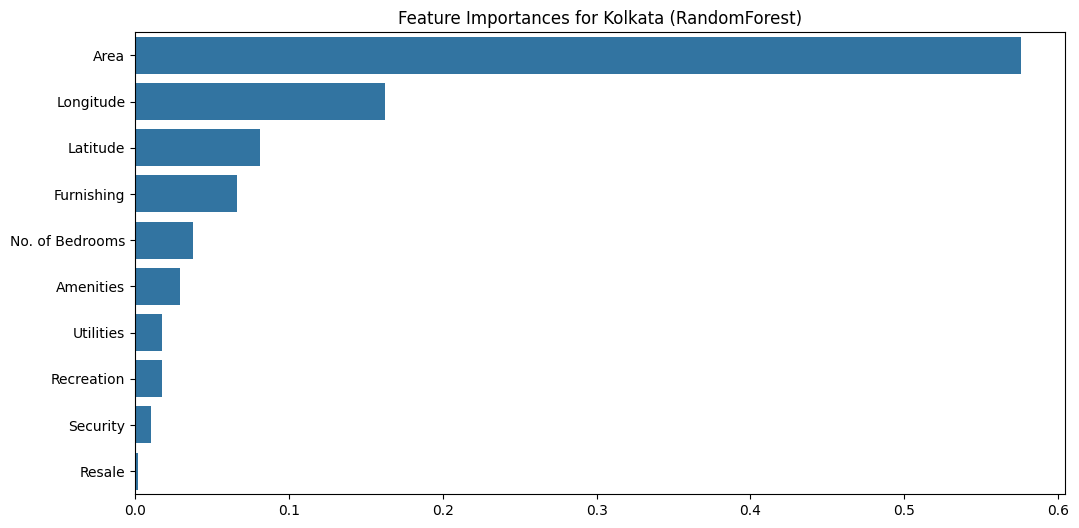

Metrics for City ID Mumbai:
Mean Absolute Error (MAE): 30.00
Mean Squared Error (MSE): 6526.55
R-squared (R²): 0.93
------------------------------


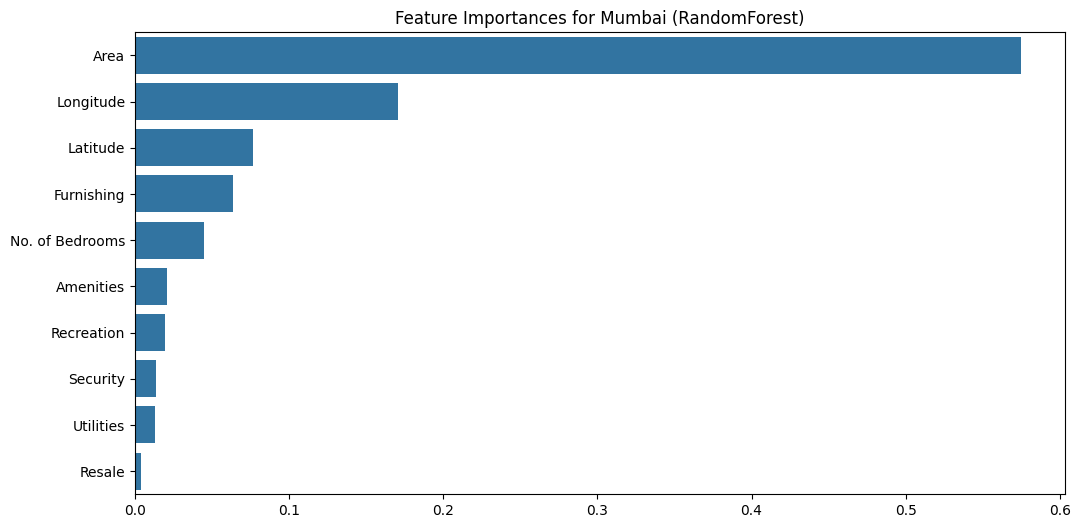

In [37]:
for city_id, group in merged.groupby('City Name'):
    # Train RandomForestRegressor
    model = RandomForestRegressor().fit(train_X, train_y)

    # Predict on validation data
    val_predictions = model.predict(val_X)

    # Calculate regression metrics
    mae = mean_absolute_error(val_y, val_predictions)
    mse = mean_squared_error(val_y, val_predictions)
    r2 = r2_score(val_y, val_predictions)

    # Print regression metrics
    print(f"Metrics for City ID {city_names[city_id]}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print("-" * 30)

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Plot feature importances for RandomForestRegressor
    plt.figure(figsize=(12, 6))
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
    plt.title(f'Feature Importances for {city_names[city_id]} (RandomForest)')
    plt.show()

In [38]:
for city_id, group in merged.groupby('City Name'):
    # Train DecisionTreeRegressor
    model2 = DecisionTreeRegressor(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

    # Predict on validation data
    val_predictions = model2.predict(val_X)

    # Calculate regression metrics
    mae = mean_absolute_error(val_y, val_predictions)
    mse = mean_squared_error(val_y, val_predictions)
    r2 = r2_score(val_y, val_predictions)

    # Print regression metrics
    print(f"Metrics for City ID {city_names[city_id]}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print("-" * 30)

    tree_graph = tree.export_graphviz(model2, out_file=None, feature_names=feature_names, filled=True)
    graphviz.Source(tree_graph).render(f"DecisionTree - {city_names[city_id]}", format='png')

Metrics for City ID Bangalore:
Mean Absolute Error (MAE): 41.55
Mean Squared Error (MSE): 6764.34
R-squared (R²): 0.93
------------------------------
Metrics for City ID Chennai:
Mean Absolute Error (MAE): 41.55
Mean Squared Error (MSE): 6764.34
R-squared (R²): 0.93
------------------------------
Metrics for City ID Delhi:
Mean Absolute Error (MAE): 41.55
Mean Squared Error (MSE): 6764.34
R-squared (R²): 0.93
------------------------------
Metrics for City ID Hyderabad:
Mean Absolute Error (MAE): 41.55
Mean Squared Error (MSE): 6764.34
R-squared (R²): 0.93
------------------------------
Metrics for City ID Kolkata:
Mean Absolute Error (MAE): 41.55
Mean Squared Error (MSE): 6764.34
R-squared (R²): 0.93
------------------------------
Metrics for City ID Mumbai:
Mean Absolute Error (MAE): 41.55
Mean Squared Error (MSE): 6764.34
R-squared (R²): 0.93
------------------------------


Metrics for City ID Bangalore:
Mean Absolute Error (MAE): 11.11
Mean Squared Error (MSE): 2101.07
R-squared (R²): 0.82
------------------------------


<ipython-input-39-f3c6a16029d5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")


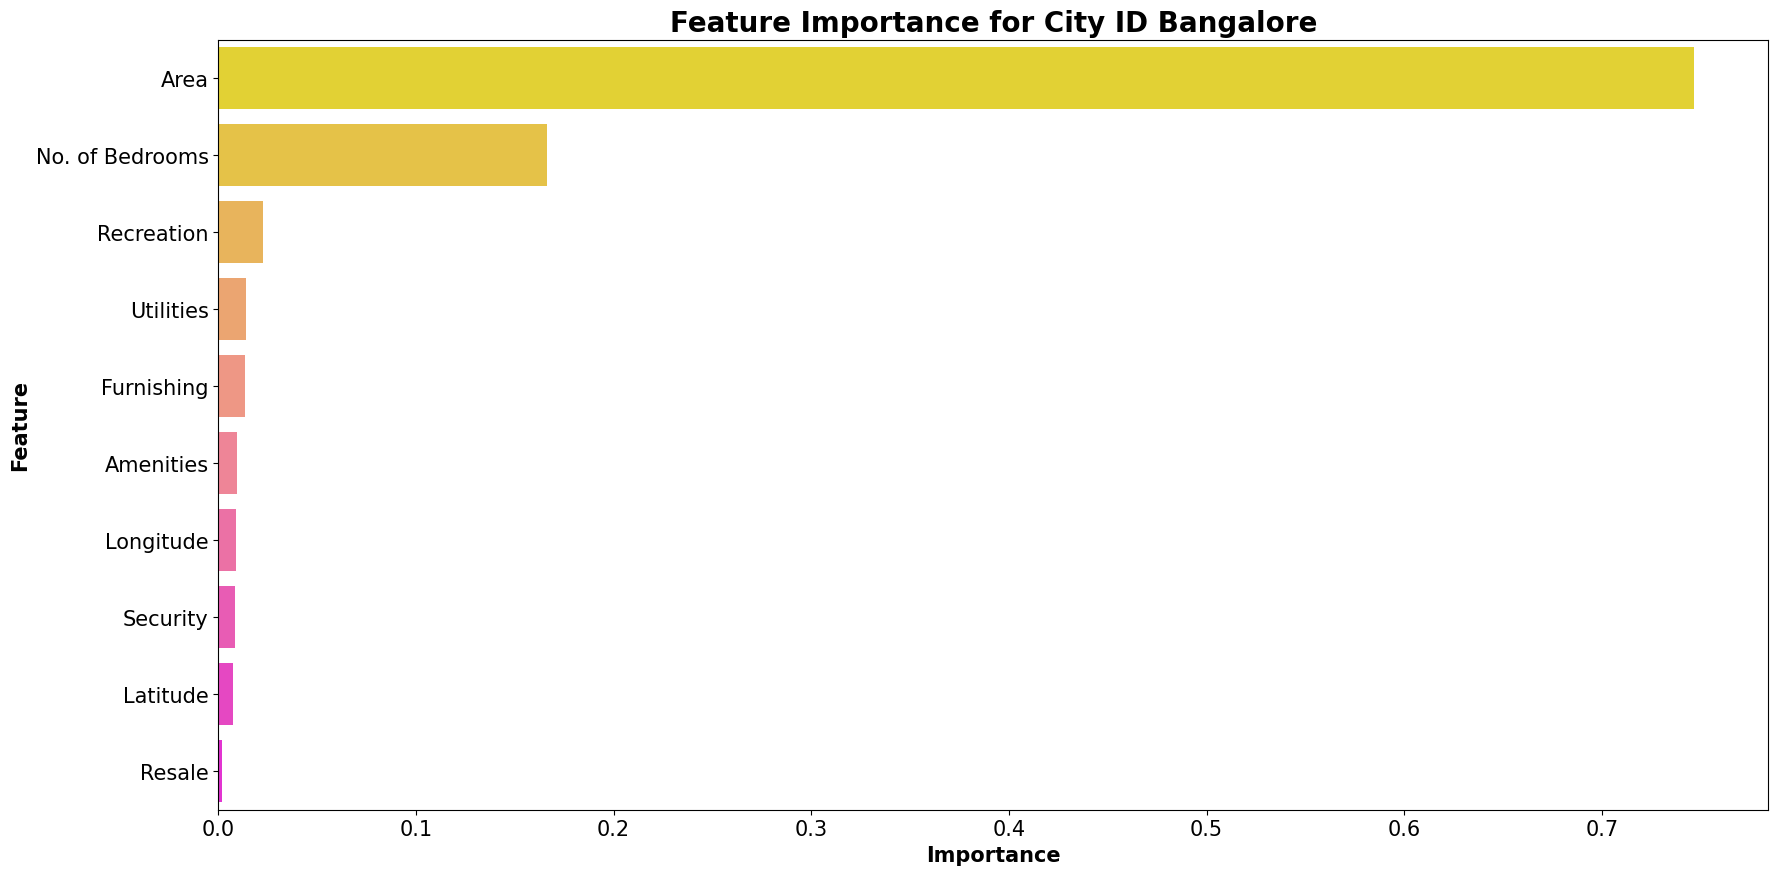

Metrics for City ID Chennai:
Mean Absolute Error (MAE): 10.52
Mean Squared Error (MSE): 884.94
R-squared (R²): 0.94
------------------------------


<ipython-input-39-f3c6a16029d5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")


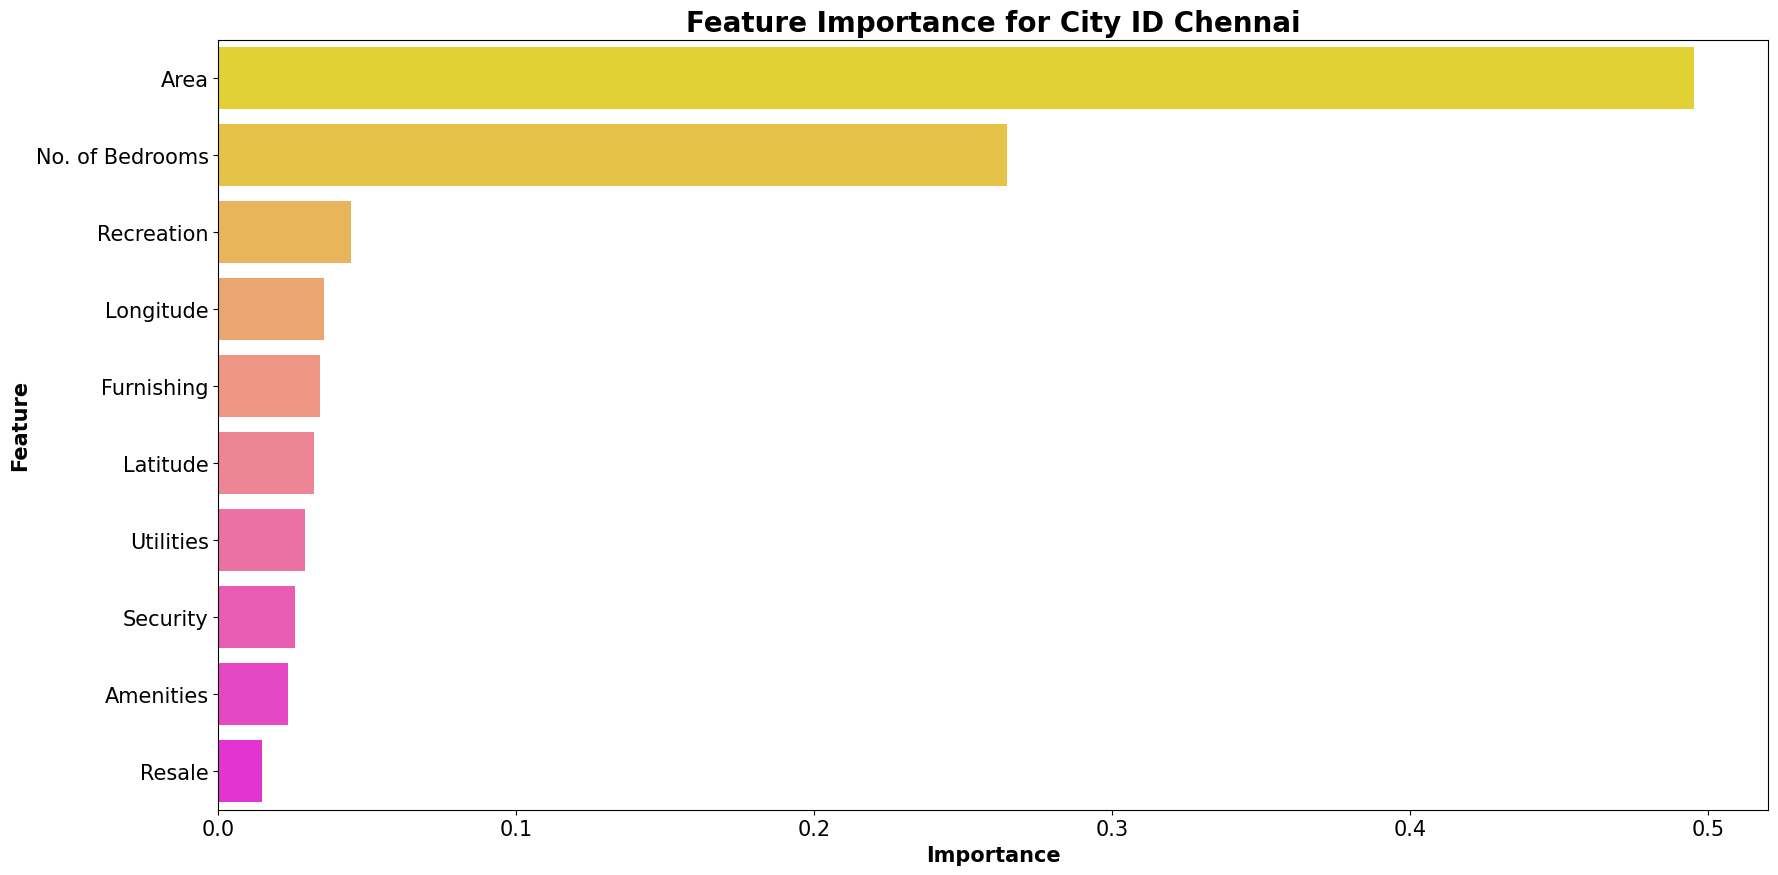

Metrics for City ID Delhi:
Mean Absolute Error (MAE): 12.78
Mean Squared Error (MSE): 1124.06
R-squared (R²): 0.83
------------------------------


<ipython-input-39-f3c6a16029d5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")


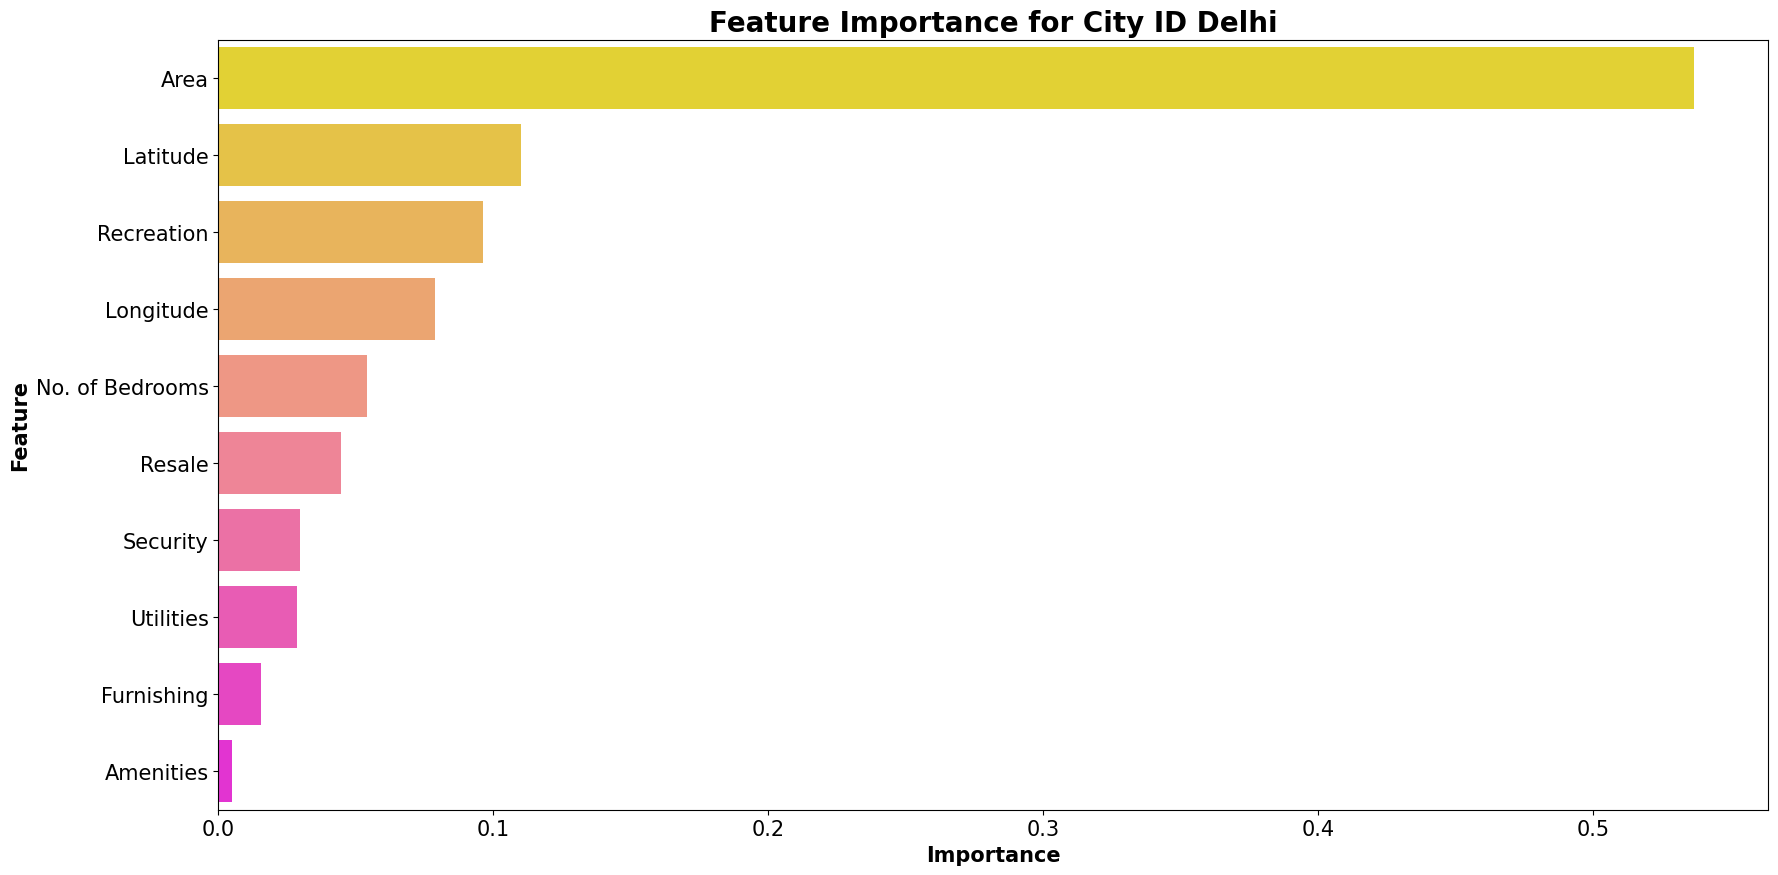

Metrics for City ID Hyderabad:
Mean Absolute Error (MAE): 14.20
Mean Squared Error (MSE): 993.32
R-squared (R²): 0.86
------------------------------


<ipython-input-39-f3c6a16029d5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")


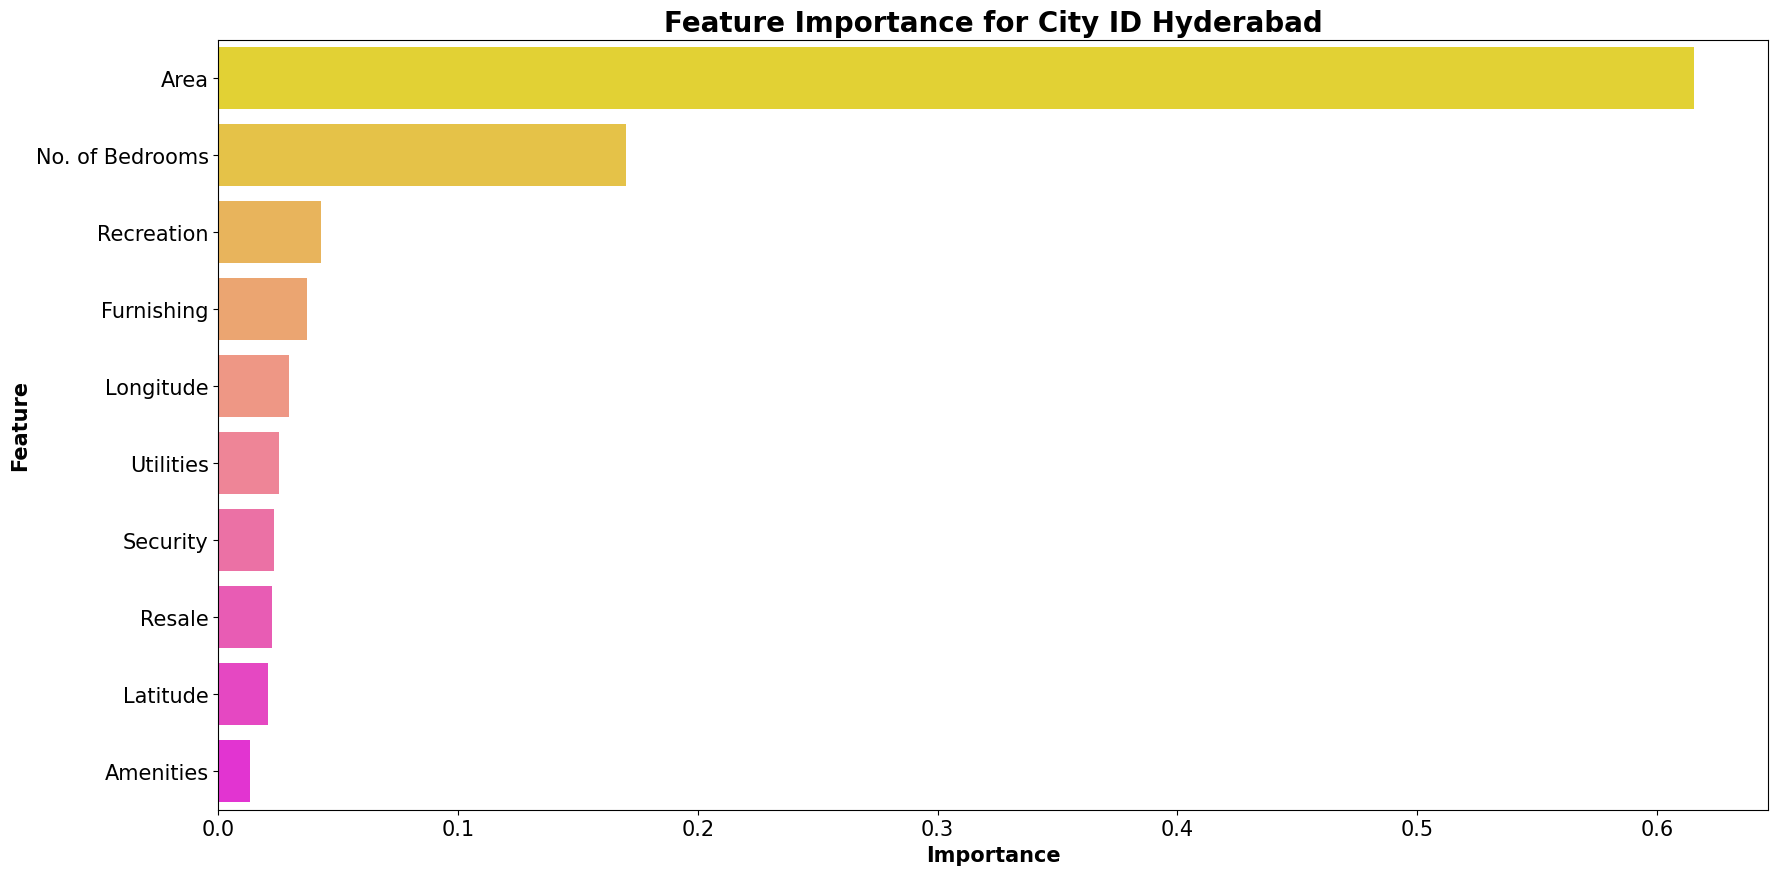

Metrics for City ID Kolkata:
Mean Absolute Error (MAE): 8.48
Mean Squared Error (MSE): 203.66
R-squared (R²): 0.98
------------------------------


<ipython-input-39-f3c6a16029d5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")


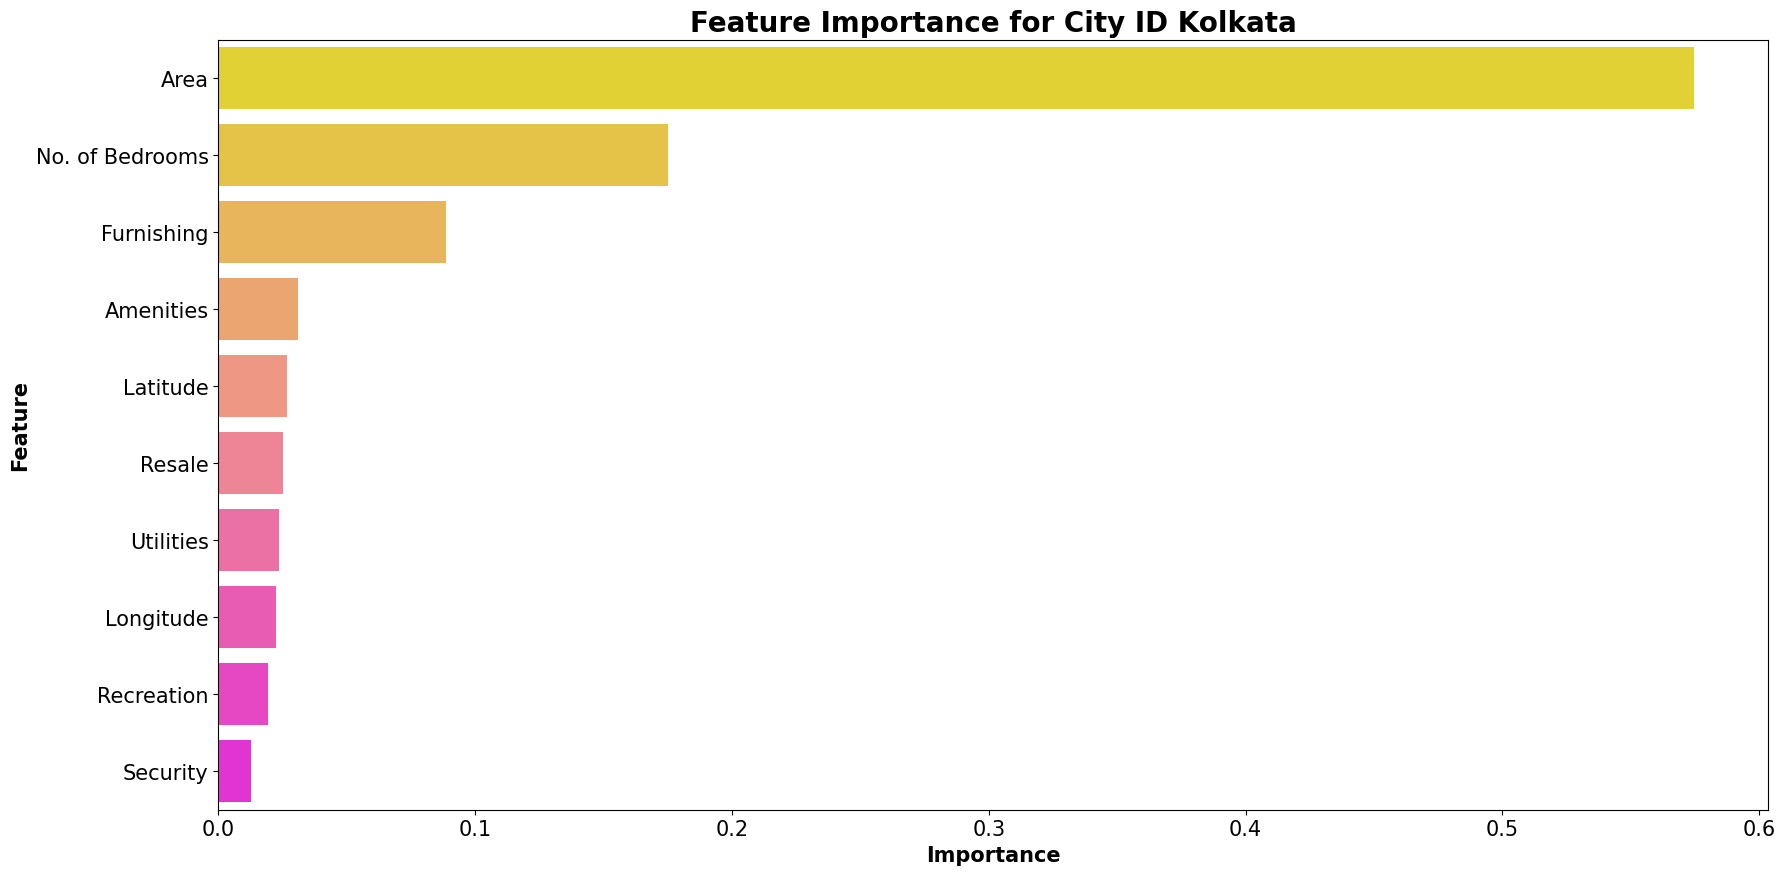

Metrics for City ID Mumbai:
Mean Absolute Error (MAE): 27.69
Mean Squared Error (MSE): 3824.77
R-squared (R²): 0.96
------------------------------


<ipython-input-39-f3c6a16029d5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")


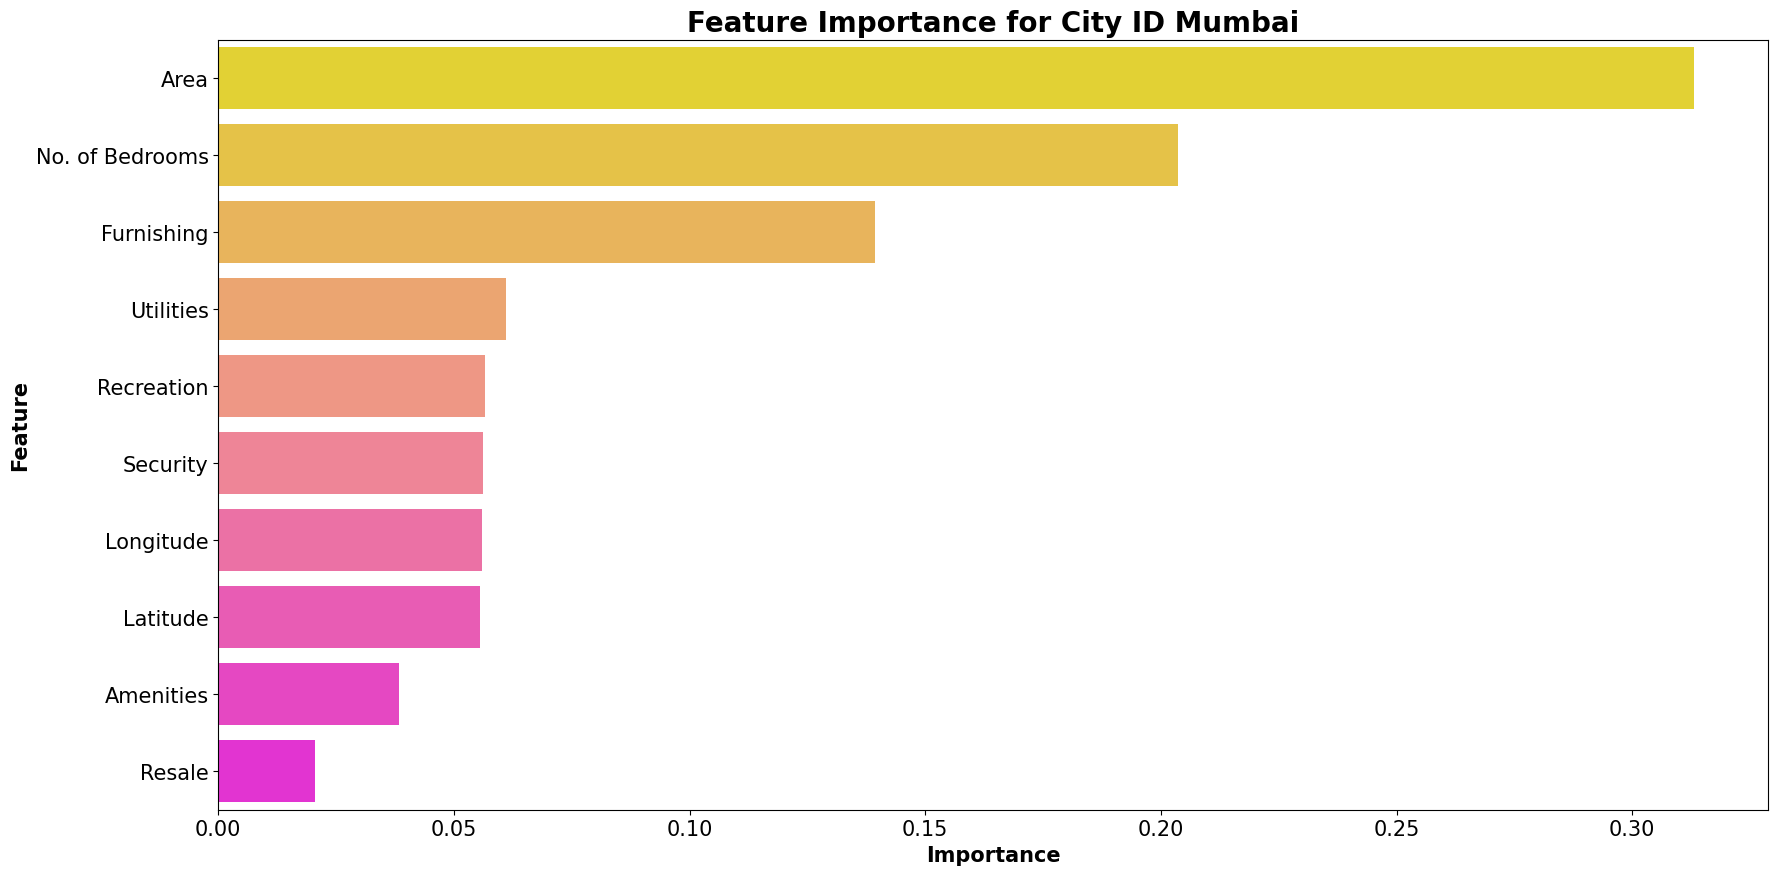

In [39]:
# Iterate over each city group
for city_id, group in merged.groupby('City Name'):
    X = group[feature_names]
    y = group[target_name]

    # Split the data
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

    # Train ExtraTreesRegressor
    model3 = ExtraTreesRegressor(random_state=1)
    model3.fit(train_X, train_y)

    # Predict on validation data
    val_predictions = model3.predict(val_X)

    # Calculate regression metrics
    mae = mean_absolute_error(val_y, val_predictions)
    mse = mean_squared_error(val_y, val_predictions)
    r2 = r2_score(val_y, val_predictions)

    # Print regression metrics
    print(f"Metrics for City ID {city_names[city_id]}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print("-" * 30)

    # Get feature importances for ExtraTreesRegressor
    fi = pd.DataFrame(model3.feature_importances_, columns=['importance'])
    fi['feature'] = feature_names
    fi = fi.sort_values('importance', ascending=False)

    # Plot feature importances for ExtraTreesRegressor
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")
    ax.tick_params(axis='both', which='both', labelsize=15)
    ax.set_xlabel('Importance', fontsize=15, weight="bold")
    ax.set_ylabel('Feature', fontsize=15, weight="bold")
    plt.title(f"Feature Importance for City ID {city_names[city_id]}", size=20, weight="bold")
    plt.show()

Metrics for City ID Bangalore:
Mean Absolute Error (MAE): 24.81
Mean Squared Error (MSE): 3857.26
R-squared (R²): 0.96
------------------------------


<ipython-input-40-b46ace3d25e1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")


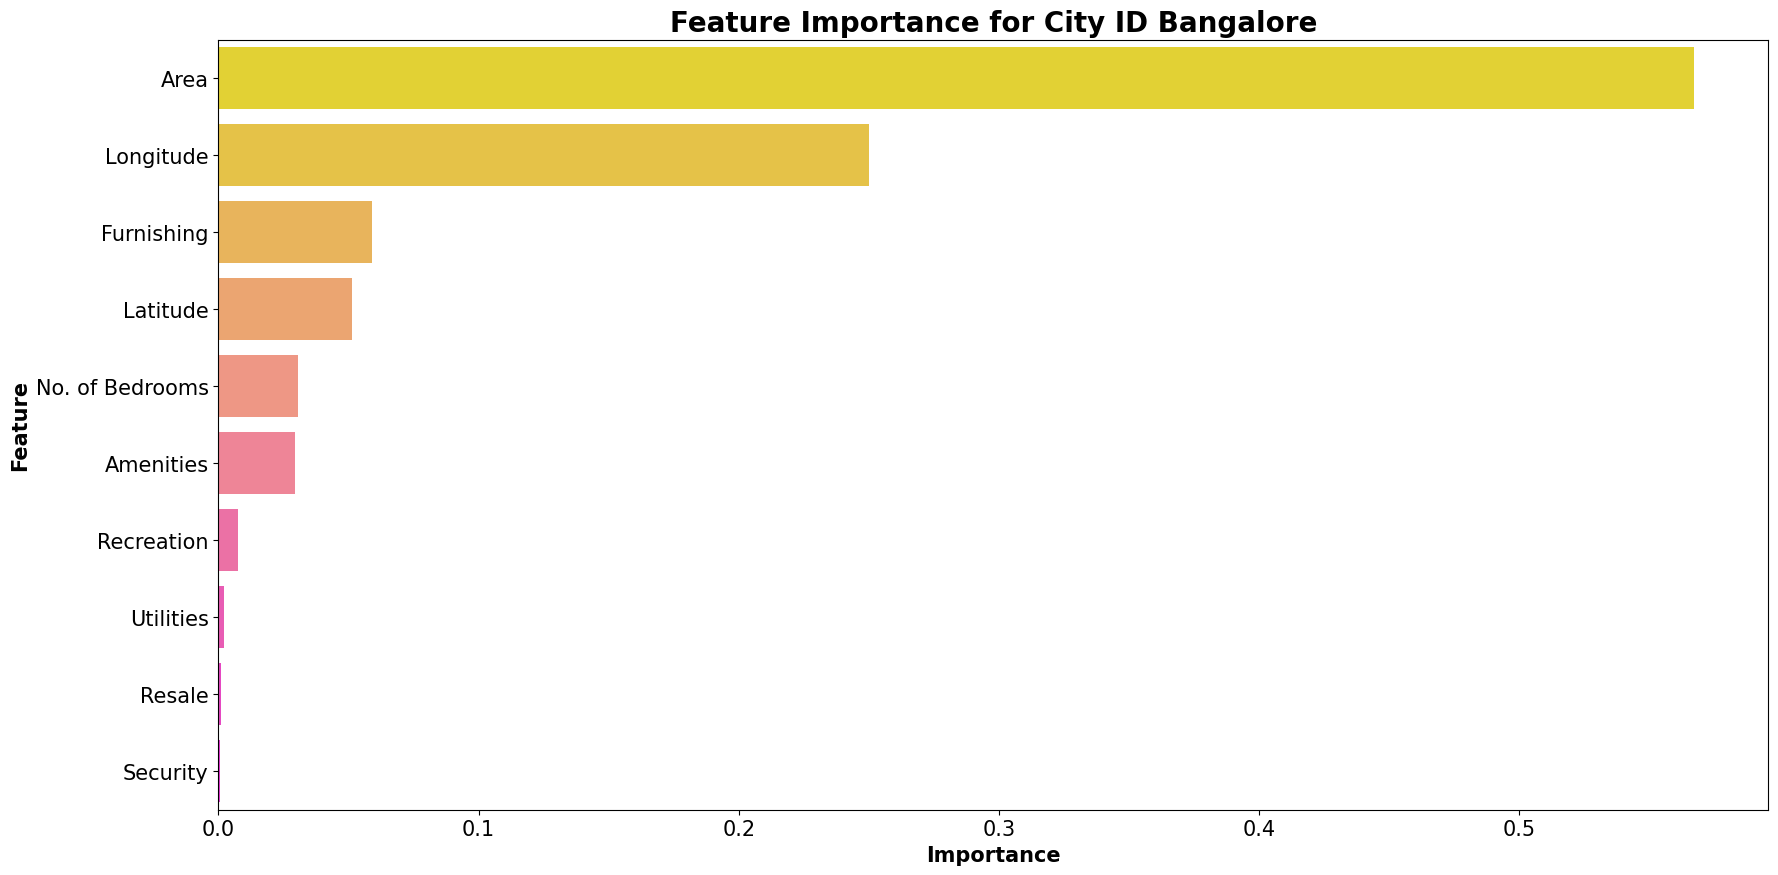

Metrics for City ID Chennai:
Mean Absolute Error (MAE): 24.81
Mean Squared Error (MSE): 3857.26
R-squared (R²): 0.96
------------------------------


<ipython-input-40-b46ace3d25e1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")


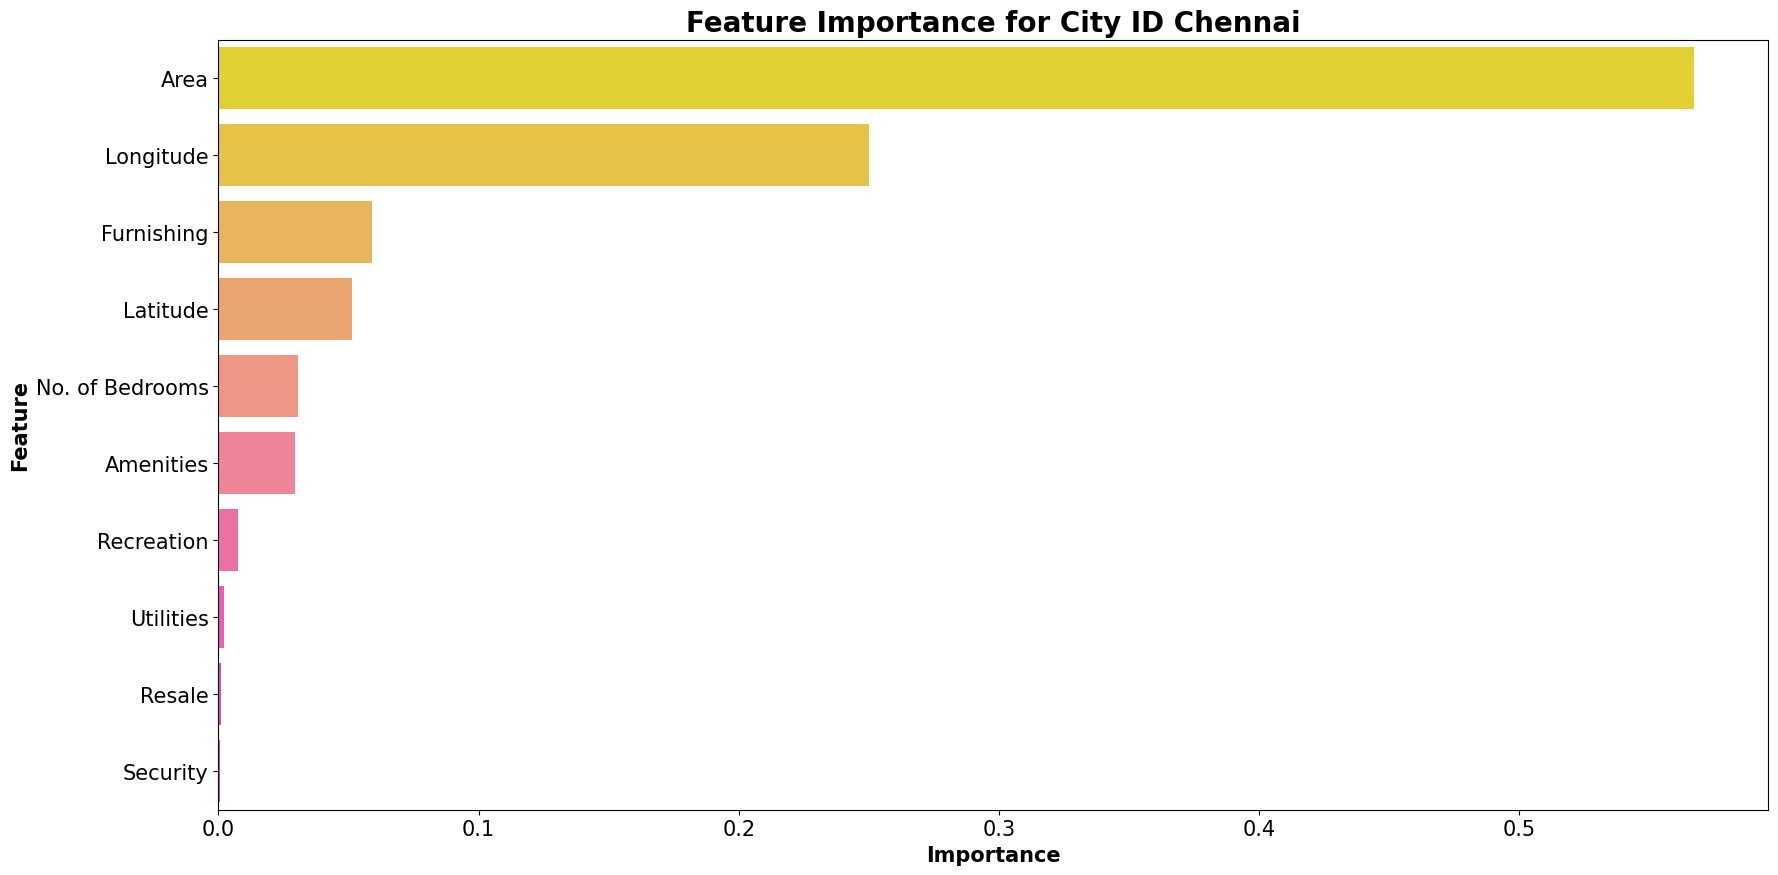

Metrics for City ID Delhi:
Mean Absolute Error (MAE): 24.81
Mean Squared Error (MSE): 3857.26
R-squared (R²): 0.96
------------------------------


<ipython-input-40-b46ace3d25e1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")


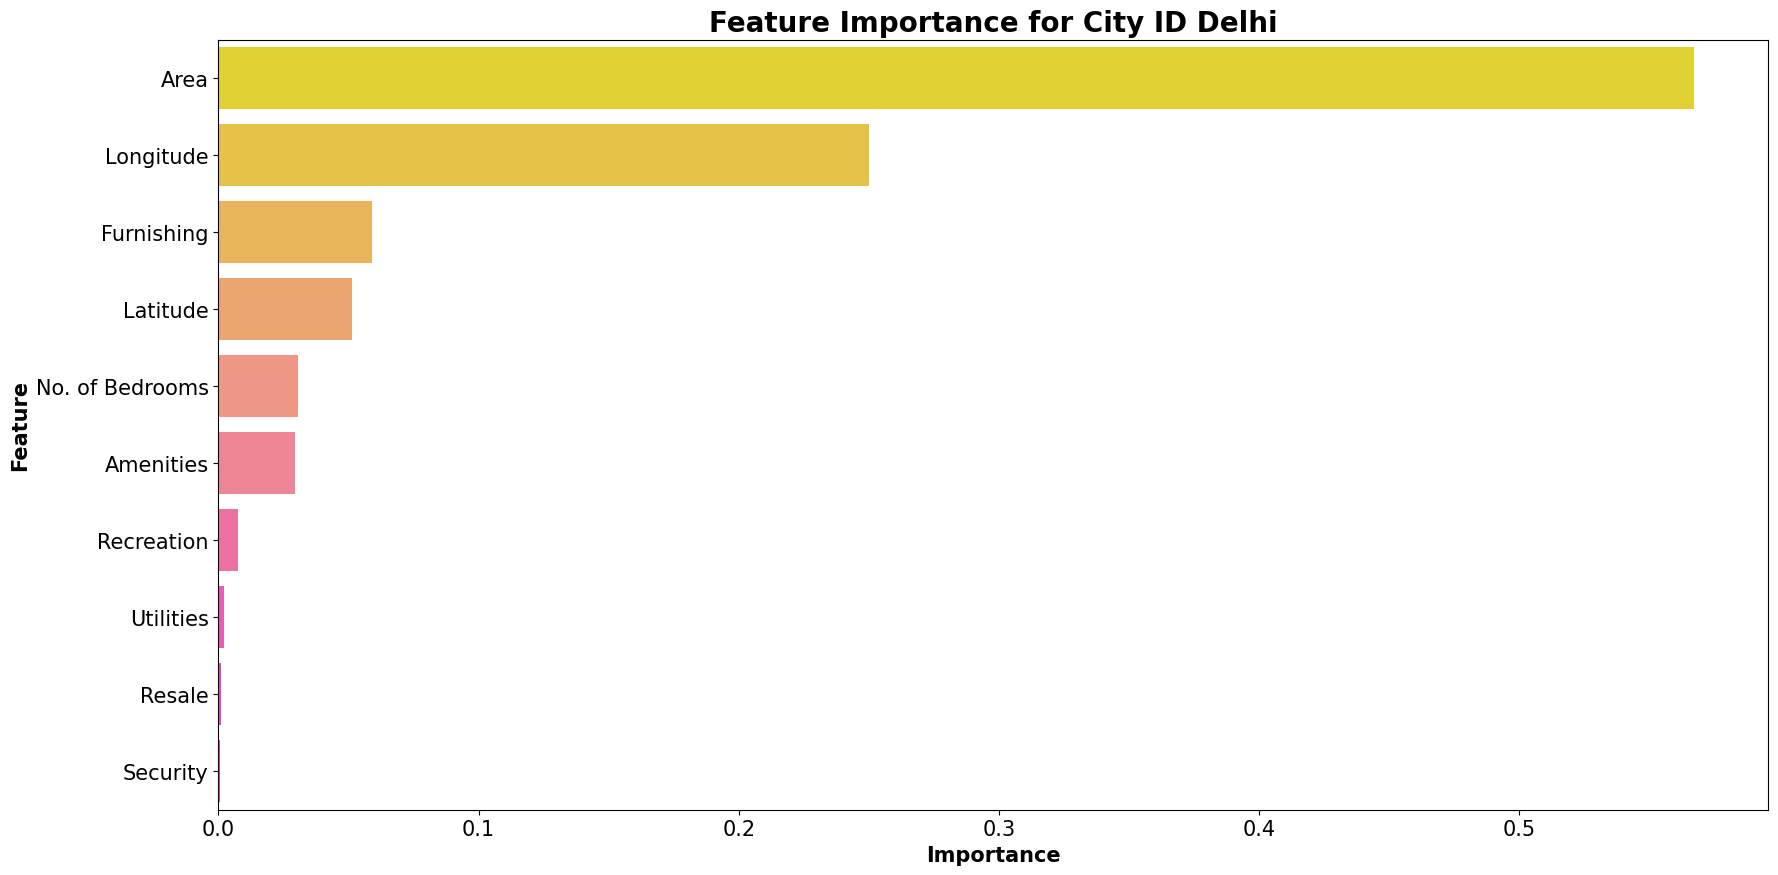

Metrics for City ID Hyderabad:
Mean Absolute Error (MAE): 24.81
Mean Squared Error (MSE): 3857.26
R-squared (R²): 0.96
------------------------------


<ipython-input-40-b46ace3d25e1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")


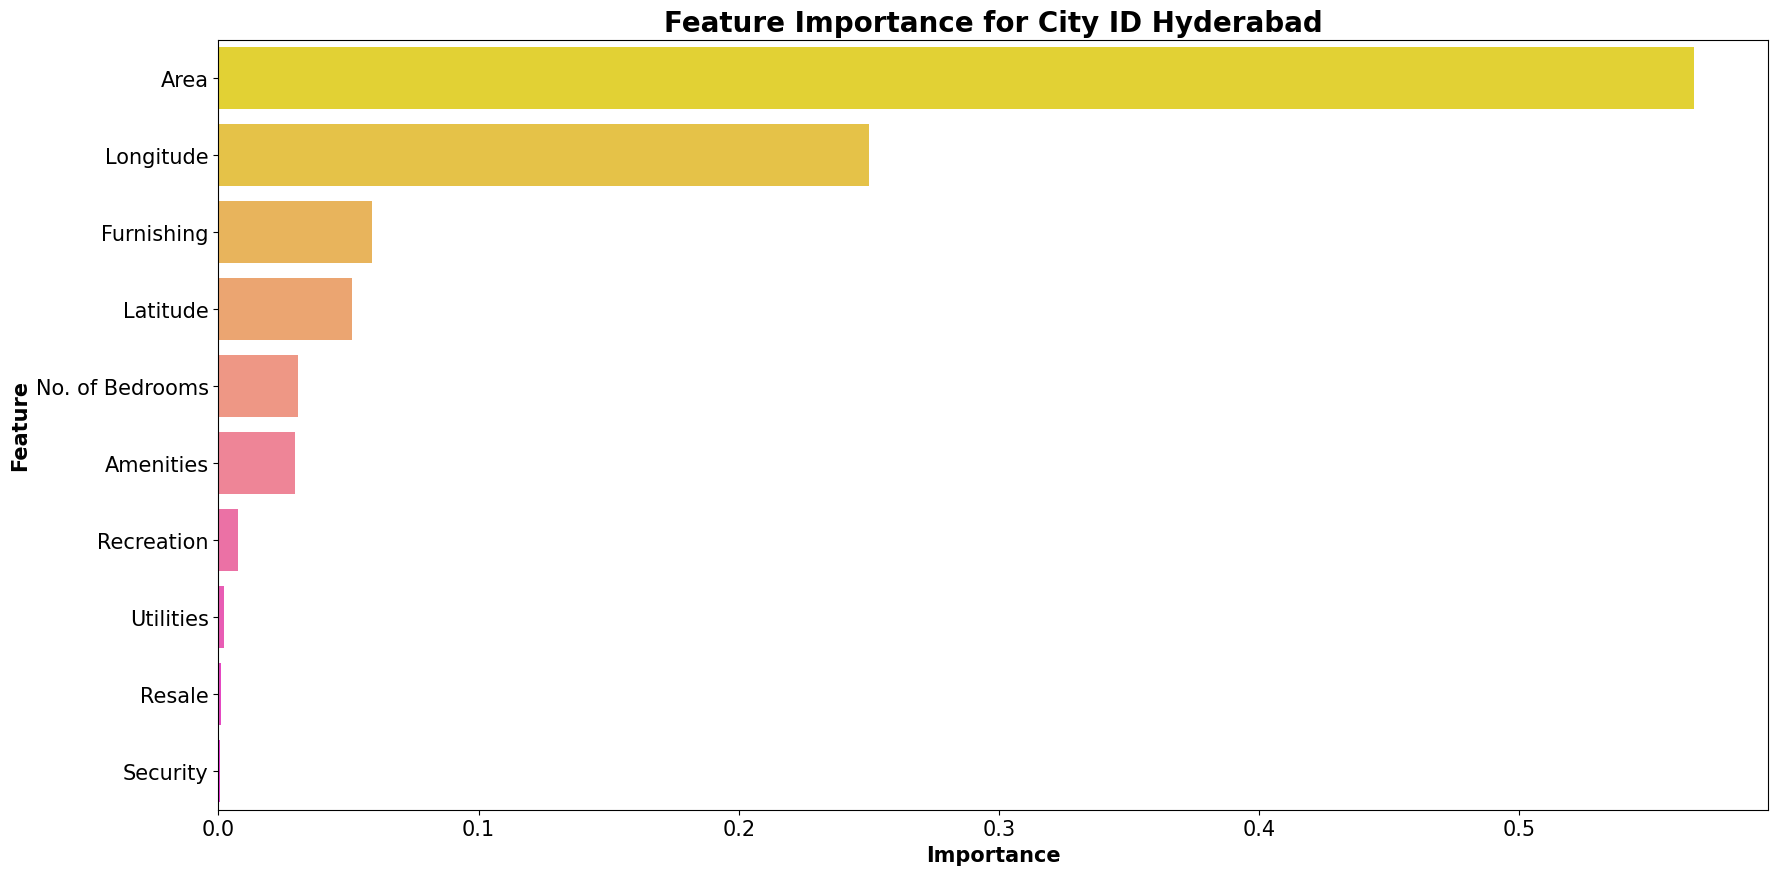

Metrics for City ID Kolkata:
Mean Absolute Error (MAE): 24.81
Mean Squared Error (MSE): 3857.26
R-squared (R²): 0.96
------------------------------


<ipython-input-40-b46ace3d25e1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")


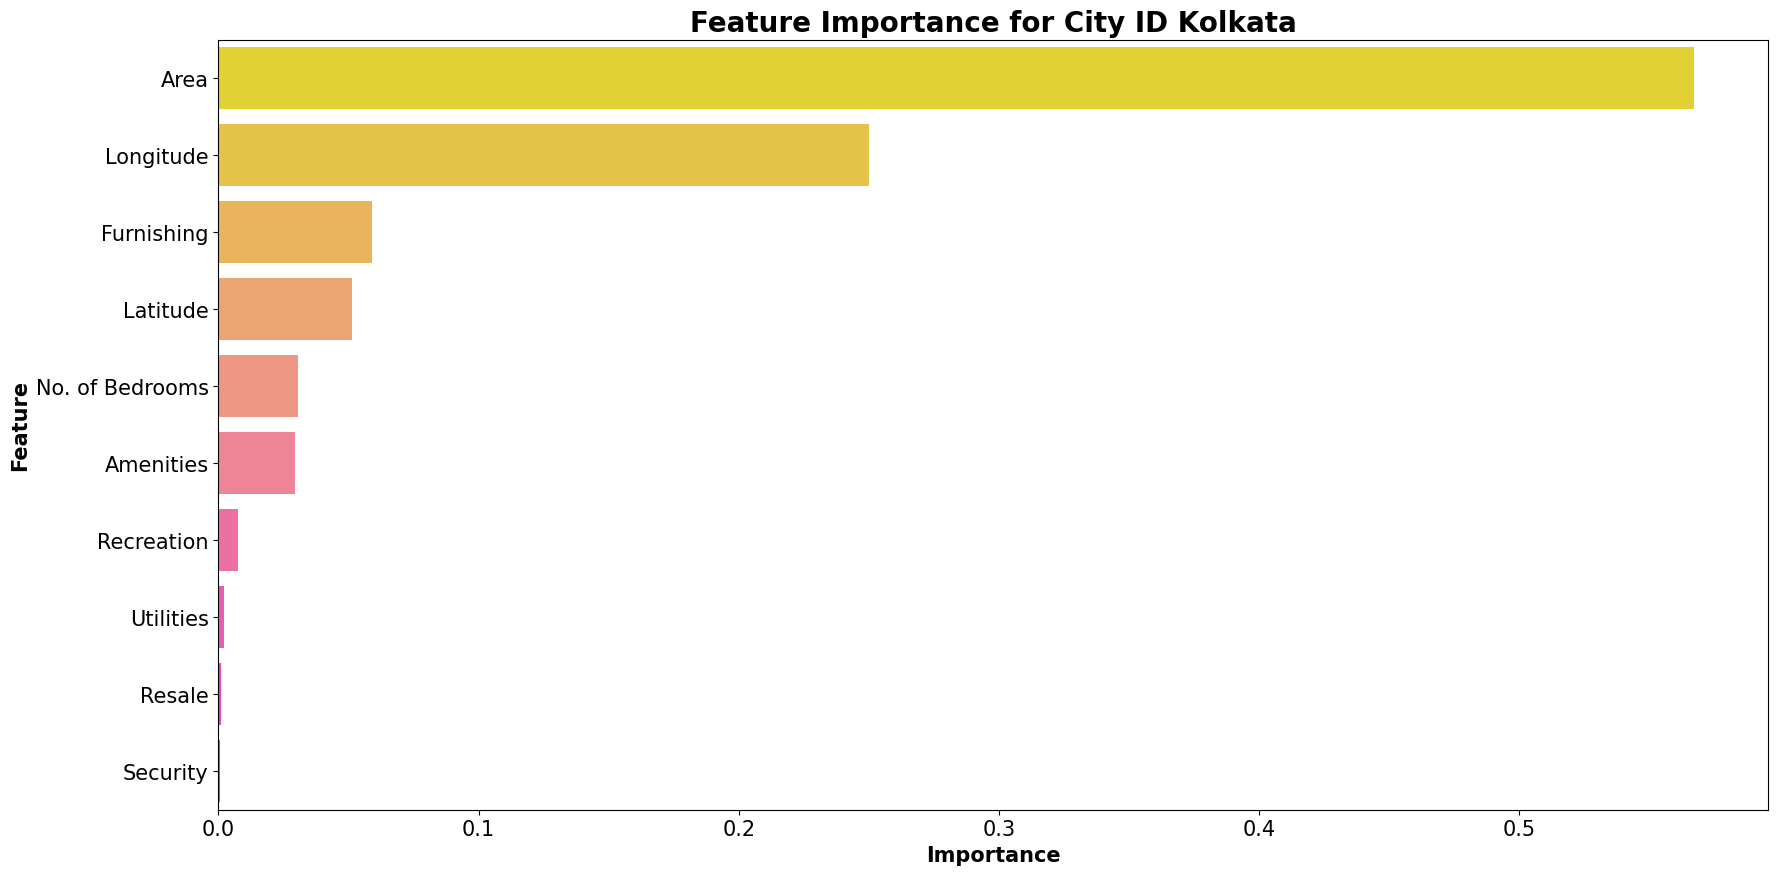

Metrics for City ID Mumbai:
Mean Absolute Error (MAE): 24.81
Mean Squared Error (MSE): 3857.26
R-squared (R²): 0.96
------------------------------


<ipython-input-40-b46ace3d25e1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")


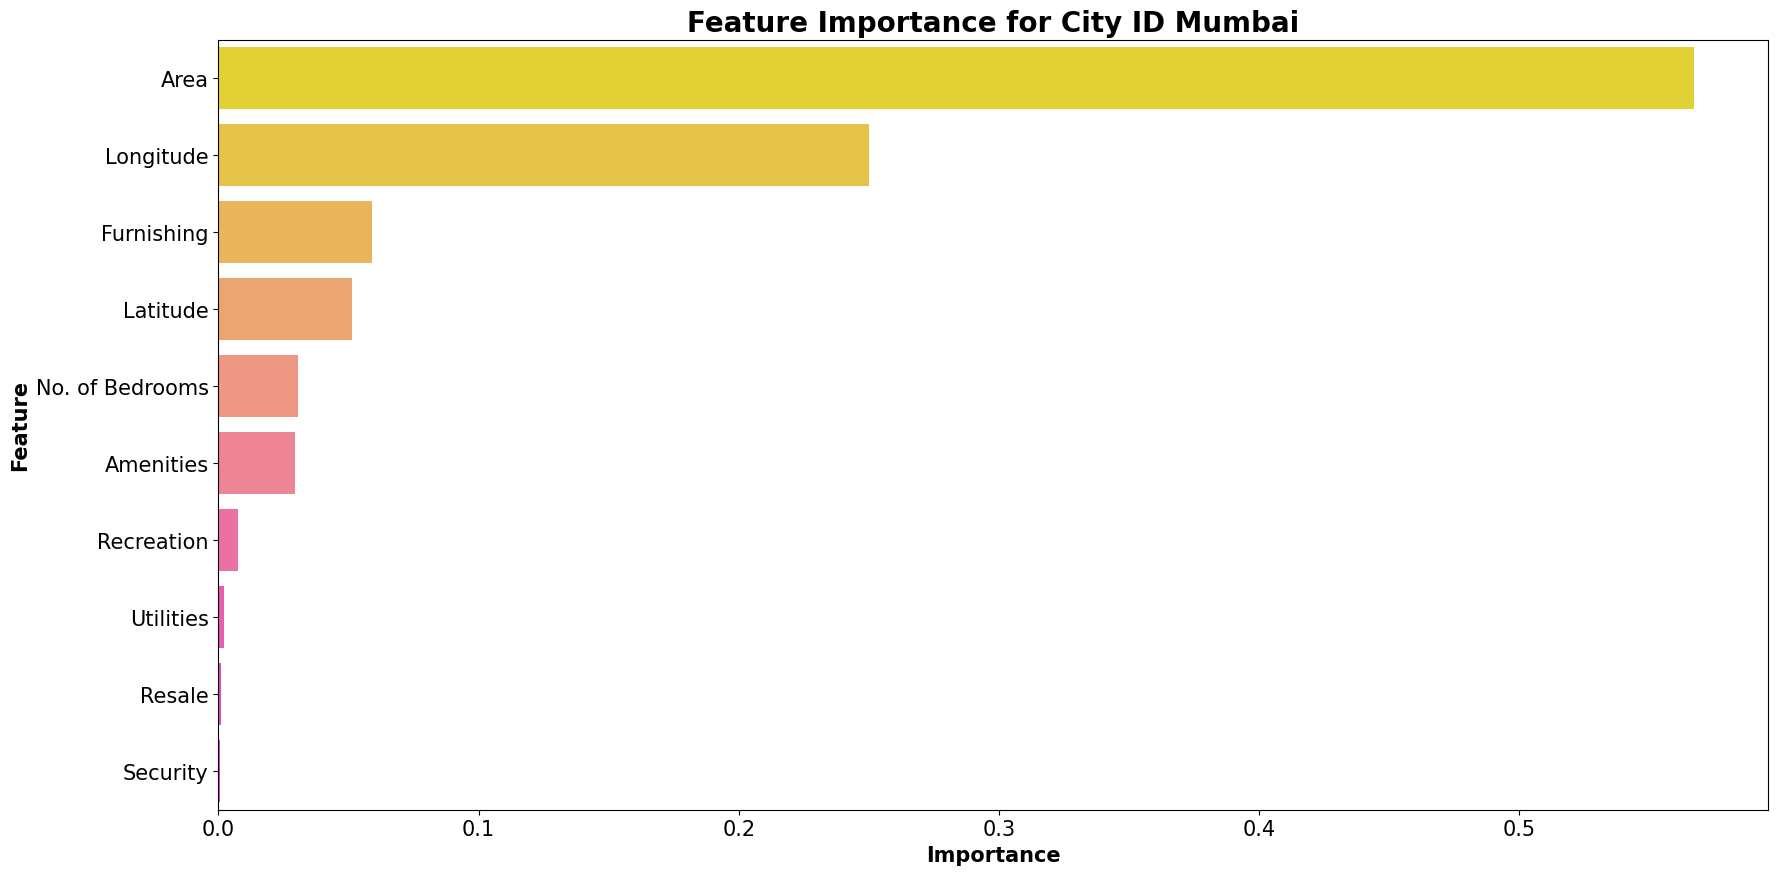

In [40]:
for city_id, group in merged.groupby('City Name'):
    # Train GradientBoostingRegressor
    model4 = GradientBoostingRegressor(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

    # Predict on validation data
    val_predictions = model4.predict(val_X)

    # Calculate regression metrics
    mae = mean_absolute_error(val_y, val_predictions)
    mse = mean_squared_error(val_y, val_predictions)
    r2 = r2_score(val_y, val_predictions)

    # Print regression metrics
    print(f"Metrics for City ID {city_names[city_id]}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print("-" * 30)

    fi = pd.DataFrame(model4.feature_importances_, columns=['importance'])
    fi['feature'] = feature_names
    fi = fi.sort_values('importance', ascending=False)

    # Plot feature importances for ExtraTreesRegressor
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(data=fi, x='importance', y='feature', palette="spring_r")
    ax.tick_params(axis='both', which='both', labelsize=15)
    ax.set_xlabel('Importance', fontsize=15, weight="bold")
    ax.set_ylabel('Feature', fontsize=15, weight="bold")
    plt.title(f"Feature Importance for City ID {city_names[city_id]}", size=20, weight="bold")
    plt.show()

In [41]:
models = [model, model2, model3,model4]
model_names = ['RandomForestRegressor', 'DecisionTreeRegressor', 'ExtraTreesRegressor','GradientBoostingRegressor']
best_model_index = -1
best_mae = float('inf')  # Initialize with a very large value

for i, model in enumerate(models):
    # Predict on validation data
    val_predictions = model.predict(val_X)

    # Calculate regression metrics
    mae = mean_absolute_error(val_y, val_predictions)
    mse = mean_squared_error(val_y, val_predictions)
    r2 = r2_score(val_y, val_predictions)

    # Print regression metrics
    print(f"Metrics for {model_names[i]}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print("-" * 30)

    # Check if this model is the best so far
    if mae < best_mae:
        best_mae = mae
        best_model_index = i

# Print the best model
print(f"The best model is: {model_names[best_model_index]}")

Metrics for RandomForestRegressor:
Mean Absolute Error (MAE): 30.00
Mean Squared Error (MSE): 6526.55
R-squared (R²): 0.93
------------------------------
Metrics for DecisionTreeRegressor:
Mean Absolute Error (MAE): 41.55
Mean Squared Error (MSE): 6764.34
R-squared (R²): 0.93
------------------------------
Metrics for ExtraTreesRegressor:
Mean Absolute Error (MAE): 27.69
Mean Squared Error (MSE): 3824.77
R-squared (R²): 0.96
------------------------------
Metrics for GradientBoostingRegressor:
Mean Absolute Error (MAE): 24.81
Mean Squared Error (MSE): 3857.26
R-squared (R²): 0.96
------------------------------
The best model is: GradientBoostingRegressor


In [42]:
city_id = int(input("Enter the city number (1-6): "))  # Example city ID
city_data = merged[merged['City Name'] == city_id]

min_price = city_data['Price'].min()
max_price = city_data['Price'].max()

selected_features = ['Location', 'No. of Bedrooms', 'Resale', 'Latitude', 'Longitude', 'Amenities', 'Security', 'Utilities', 'Recreation', 'Furnishing']

# Create price bins with a size of 50k
price_bins = np.arange(min_price, max_price + 500, 500)

for i in range(len(price_bins) - 1):
    # Filter data for the current price bin
    price_min = price_bins[i]
    price_max = price_bins[i + 1]
    price_range_data = city_data[(city_data['Price'] >= price_min) & (city_data['Price'] < price_max)]

    if not price_range_data.empty:  # Check if there is data for the current price range
        # Predict the best possible area and features for the current price range using model2
        features = price_range_data.drop(['Price', 'City Name', 'Location'], axis=1)
        # Reorder the columns of features to match the order of feature_names
        features = features.reindex(columns=feature_names)

        predictions = model4.predict(features)

        # Find the index of the prediction with the highest price
        best_prediction_index = np.argmax(predictions)
        best_prediction = price_range_data.iloc[best_prediction_index]

        # Display the result in a tabular format
        result = {
            'Price Range': f"{price_min}-{price_max}",
            'Best Possible Area': best_prediction['Area'],
            'Best Possible Features': ', '.join([f"{feature}: {best_prediction[feature]}" for feature in selected_features])
        }

        print(tabulate([result], headers='keys', tablefmt='fancy_grid'))
        print("-" * 50)

Enter the city number (1-6): 4
╒═══════════════╤══════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Price Range   │   Best Possible Area │ Best Possible Features                                                                                                                                                            │
╞═══════════════╪══════════════════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ 20.0-520.0    │                 1935 │ Location: Narsingi, No. of Bedrooms: 3.0, Resale: 1, Latitude: 18.0191012, Longitude: 78.0692712, Amenities: 0.0, Security: 2.0, Utilities: 2.0, Recreation: 3.0, Furnishing: 6.0 │
╘═══════════════╧══════════════════════╧═════════════════════════════════════════════